# Evaluation to the Sustainability of Singapore's Housing Sector
## — A Quantitative View of the HDB Resale Market

## Table of Contents

#### Section 1: Problem Definition

#### Section 2: Data Collection and Curation

#### Section 3: Data Pre-processing

#### Section 4: Exploration Data Analysis and Visualization
-  4-1. HDB Supply and Population Growth
-  4-2. Relationship Between Economic Growth, Household Income, and HDB Resale Price
-  4-3. Relation Between HDB Flat Types and Resale Prices
-  4-4. Spatial Distribution of HDB at Different Resale Prices
-  4-5. Most Popular Attributes of HDB Flat

#### Section 5: Predictive analysis
-  5-1. Predictive Analysis Approach
-  5-2. HDB Resale Price Prediction Model
-  5-3. Trend of Future Price

#### Section 6: Conclusion


## Section 1. Problem Definition
This research is based on the indicators proposed by this paper:Indicators for Sustainable housing: https://iopscience.iop.org/article/10.1088/1757-899X/518/2/022009/pdf (Zaineb Salman Shama and Jamal Baqir Motlak 2019 IOP Conf. Ser.: Mater. Sci.Eng. 518 022009).      
This article takes on a more comprehensive view that recognize the multiple functions of housing as a physical and social system. It is stipulated that "Sustainable housing policies must deal with affordability, social and cultural equity and the economic impact of housing and contribute to making neighbourhood more healthier and more sustainable."  

The primary objective of our data analysis pipeline is to evaluate the sustainability and performance of Singapore's Housing and Development Board (HDB) resale market. By examining historical price data and demographic shifts, we seek to understand how market dynamics are influenced by economic conditions, policy changes, and urban development. This includes identifying popular housing types and regions, tracking pricing trends, and spotting any irregular market behaviors that may suggest anomalies or shifts in buyer preferences. Additionally, a critical component of this analysis is to develop predictive models that forecast future price trends based on historical data, which will enable stakeholders to make informed decisions regarding housing policies, market predictions, and urban planning.

## Section 2: Data Collection and Curation
Most of the primary dataset for this project was sourced from data.gov.sg. The commencement dates of MRT stations were manually curated from the official website of the Land Transport Authority (LTA) in Singapore (www.lta.gov.sg).

Main Data Set:
- HDB Resale Flat Prices from 1990 to 2023

Supporting Data Sets:
- Singapore Population from 1950 to 2023
- Singapore GDP from 1975 to 2023
- Total HDB Counts from 1980 to 2022
- Resident Households by Type of Dwelling from 2000 to 2022
- Street Location dataset of HDB Flats
- Location and Commencement Dates of MRT Location

## Section 3. Data Pre-processing
Steps include as follows:
1. Load and merge original datasets;
2. Verify and deal with duplicate values and missing values;
3. Verify and set appropriate data types;
4. Identify categorical and numerical values;
5. Calculate floor area per sqm to prepare for further analysis.

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# specify the path of file folder
folder_path = "data/resale_price"

# read all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# create a df to save all data from file
data_df = pd.DataFrame()

for filename in file_list:
    file_path = os.path.join(folder_path,filename)
    df = pd.read_csv(file_path,encoding = 'utf-8')
    data_df = pd.concat([data_df,df],ignore_index=True)

data_df


month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
909453  2014-12      YISHUN     5 ROOM   816      YISHUN ST 81     10 TO 12   
909454  2014-12      YISHUN  EXECUTIVE   325       YISHUN CTRL     10 TO 12   
909455  2014-12      YISHUN  EXECUTIVE   618    YISHUN RING RD     07 TO 09   
909456  2014-12      YISHUN  EXECUTIVE   277      YISHUN ST 22     07 TO 09   
909457  2014-12      YISHUN  EXECUTIVE   277      YISHUN ST 22     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
909453           122.0        Improved                 1988      580000.0   
909454           146.0      Maisonette                 1988      540000.0   
909455           164.0       Apartment                 1992      738000.0   
909456           152.0      Maisonette                 1985      592000.0   
909457           146.0      Maisonette                 1985      545000.0   

       remaining_lease  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
909453             NaN  
909454             NaN  
909455             NaN  
909456             NaN  
909457             NaN  

[909458 rows x 11 columns]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909458 entries, 0 to 909457
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                909458 non-null  object 
 1   town                 909458 non-null  object 
 2   flat_type            909458 non-null  object 
 3   block                909458 non-null  object 
 4   street_name          909458 non-null  object 
 5   storey_range         909458 non-null  object 
 6   floor_area_sqm       909458 non-null  float64
 7   flat_model           909458 non-null  object 
 8   lease_commence_date  909458 non-null  int64  
 9   resale_price         909458 non-null  float64
 10  remaining_lease      200408 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.3+ MB


In [ ]:
data_df['date'] = pd.to_datetime(data_df['month'])
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df = data_df.sort_values(by=['year','month']).reset_index(drop=True)
data_df

month        town flat_type block       street_name storey_range  \
0           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...       ...   ...               ...          ...   
909453     10      YISHUN    4 ROOM   756      YISHUN ST 72     01 TO 03   
909454     10      YISHUN    4 ROOM   756      YISHUN ST 72     04 TO 06   
909455     10      YISHUN    4 ROOM   876      YISHUN ST 81     01 TO 03   
909456     10      YISHUN    5 ROOM  508B      YISHUN AVE 4     01 TO 03   
909457     10      YISHUN    5 ROOM   733      YISHUN AVE 5     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
909453            84.0      Simplified                 1985      418000.0   
909454           104.0         Model A                 1985      500000.0   
909455            88.0      Simplified                 1987      453000.0   
909456           113.0        Improved                 2018      635000.0   
909457           123.0        Improved                 1984      590000.0   

           remaining_lease       date  year  
0                      NaN 1990-01-01  1990  
1                      NaN 1990-01-01  1990  
2                      NaN 1990-01-01  1990  
3                      NaN 1990-01-01  1990  
4                      NaN 1990-01-01  1990  
...                    ...        ...   ...  
909453   61 years 01 month 2023-10-01  2023  
909454   61 years 01 month 2023-10-01  2023  
909455  63 years 03 months 2023-10-01  2023  
909456  93 years 07 months 2023-10-01  2023  
909457            60 years 2023-10-01  2023  

[909458 rows x 13 columns]

In [ ]:
# find out the values of catagorical columns
col_name = ['town','flat_type','street_name','storey_range','flat_model']
uniq_values = {col: df[col].unique() for col in col_name}

# view the values of all columns
for col,values in uniq_values.items():
    print(f'unique value of col {col}:{values}\n ')

# set all string value to uppercase
for col in col_name:
    data_df[col] = data_df[col].str.upper()

unique value of col town:['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
 
unique value of col flat_type:['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' 'MULTI-GENERATION'
 '1 ROOM']
 
unique value of col street_name:['ANG MO KIO AVE 4' 'ANG MO KIO AVE 8' 'ANG MO KIO AVE 10'
 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 1'
 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 6' 'ANG MO KIO ST 32'
 'ANG MO KIO ST 52' 'ANG MO KIO ST 21' 'ANG MO KIO ST 31'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK NTH RD' 'CHAI CHEE RD'
 'BEDOK STH AVE 1' 'BEDOK NTH ST 4' 'BEDOK NTH ST 2' 'BEDOK STH RD'
 'CHAI CHEE DR' 'CHAI CHEE AVE' 'BEDOK NTH AVE 1' 'BEDOK STH AVE 3'
 'NEW UPP CHANGI RD' 'BEDOK NTH AVE 4' 'BEDOK NTH ST 1' 'BED

In [ ]:
# create a new column: price_per_sqm
data_df['price_per_sqm'] = round(data_df['resale_price']/data_df['floor_area_sqm'],2)
data_df

month        town flat_type block       street_name storey_range  \
0           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...       ...   ...               ...          ...   
909453     10      YISHUN    4 ROOM   756      YISHUN ST 72     01 TO 03   
909454     10      YISHUN    4 ROOM   756      YISHUN ST 72     04 TO 06   
909455     10      YISHUN    4 ROOM   876      YISHUN ST 81     01 TO 03   
909456     10      YISHUN    5 ROOM  508B      YISHUN AVE 4     01 TO 03   
909457     10      YISHUN    5 ROOM   733      YISHUN AVE 5     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
909453            84.0      SIMPLIFIED                 1985      418000.0   
909454           104.0         MODEL A                 1985      500000.0   
909455            88.0      SIMPLIFIED                 1987      453000.0   
909456           113.0        IMPROVED                 2018      635000.0   
909457           123.0        IMPROVED                 1984      590000.0   

           remaining_lease       date  year  price_per_sqm  
0                      NaN 1990-01-01  1990         290.32  
1                      NaN 1990-01-01  1990         193.55  
2                      NaN 1990-01-01  1990         258.06  
3                      NaN 1990-01-01  1990         193.55  
4                      NaN 1990-01-01  1990         646.58  
...                    ...        ...   ...            ...  
909453   61 years 01 month 2023-10-01  2023        4976.19  
909454   61 years 01 month 2023-10-01  2023        4807.69  
909455  63 years 03 months 2023-10-01  2023        5147.73  
909456  93 years 07 months 2023-10-01  2023        5619.47  
909457            60 years 2023-10-01  2023        4796.75  

[909458 rows x 14 columns]

In [ ]:
missing_v = data_df.isnull().sum()
missing_v

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
date                        0
year                        0
price_per_sqm               0
dtype: int64

In [ ]:
# only one column has missing value
data_df.fillna(0,inplace=True)

In [ ]:
# missing value after fillna
missing_v2 = data_df.isnull().sum()
missing_v2

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
date                   0
year                   0
price_per_sqm          0
dtype: int64

In [ ]:
data_df['flat_type'].replace("MULTI-GENERATION","MULTI GENERATION",inplace=True)
data_df

month        town flat_type block       street_name storey_range  \
0           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...       ...   ...               ...          ...   
909453     10      YISHUN    4 ROOM   756      YISHUN ST 72     01 TO 03   
909454     10      YISHUN    4 ROOM   756      YISHUN ST 72     04 TO 06   
909455     10      YISHUN    4 ROOM   876      YISHUN ST 81     01 TO 03   
909456     10      YISHUN    5 ROOM  508B      YISHUN AVE 4     01 TO 03   
909457     10      YISHUN    5 ROOM   733      YISHUN AVE 5     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
909453            84.0      SIMPLIFIED                 1985      418000.0   
909454           104.0         MODEL A                 1985      500000.0   
909455            88.0      SIMPLIFIED                 1987      453000.0   
909456           113.0        IMPROVED                 2018      635000.0   
909457           123.0        IMPROVED                 1984      590000.0   

           remaining_lease       date  year  price_per_sqm  
0                        0 1990-01-01  1990         290.32  
1                        0 1990-01-01  1990         193.55  
2                        0 1990-01-01  1990         258.06  
3                        0 1990-01-01  1990         193.55  
4                        0 1990-01-01  1990         646.58  
...                    ...        ...   ...            ...  
909453   61 years 01 month 2023-10-01  2023        4976.19  
909454   61 years 01 month 2023-10-01  2023        4807.69  
909455  63 years 03 months 2023-10-01  2023        5147.73  
909456  93 years 07 months 2023-10-01  2023        5619.47  
909457            60 years 2023-10-01  2023        4796.75  

[909458 rows x 14 columns]

## Section 4. Exploration Data Analysis and Findings  

### Part 1. The supply of HDB flats and population growth
In this part, we will explore the relationship between population growth and the supply of HDB flats in order to find how HDB development meet the demand of increasing population.     

In [ ]:
# calculate the avg resale price
avg_resale_prices = data_df.groupby('year')['resale_price'].mean()
# calculate the percent change of resale price by year
resale_growth_rates = (avg_resale_prices.pct_change() * 100).dropna()
# import additional dataset population dataset from SG statis gov website
population_file_path = 'data/population_dataset.csv'
population_df = pd.read_csv(population_file_path,encoding = 'utf-8')
population_df

Data Series      2023       2022   \
0                           Total Population (Number)  5,917,648  5,637,022   
1                        Resident Population (Number)  4,149,253  4,073,239   
2               Singapore Citizen Population (Number)  3,610,658  3,553,749   
3              Permanent Resident Population (Number)    538,595    519,490   
4                    Non-Resident Population (Number)  1,768,395  1,563,783   
5                  Total Population Growth (Per Cent)          5        3.4   
6               Resident Population Growth (Per Cent)        1.9        2.2   
7   Population Density (Total Population Per Squar...      8,058      7,688   
8              Sex Ratio (Males Per Thousand Females)        950        955   
9           Median Age Of Resident Population (Years)       42.4       42.1   
10           Median Age Of Citizen Population (Years)         43       42.8   
11  Old-Age Support Ratio:Residents Aged 15-64 Yea...          4        4.1   
12  Age Dependency Ratio:Residents Aged Under 15 Y...       45.6       44.8   
13  Child Dependency Ratio:Residents Aged Under 15...       20.4       20.7   
14  Old-Age Dependency Ratio:Residents Aged 65 Yea...       25.2       24.1   
15  Old-Age Support Ratio:Residents Aged 20-64 Yea...        3.7        3.8   
16  Age Dependency Ratio:Residents Aged Under 20 Y...       57.2       56.3   
17  Child Dependency Ratio:Residents Aged Under 20...         30       30.3   
18  Old-Age Dependency Ratio:Residents Aged 65 Yea...       27.2         26   
19  Old-Age Support Ratio:Citizens Aged 15-64 Year...        3.5        3.6   
20  Age Dependency Ratio:Citizens Aged Under 15 Ye...       51.1         50   
21  Child Dependency Ratio:Citizens Aged Under 15 ...       22.3       22.4   
22  Old-Age Dependency Ratio:Citizens Aged 65 Year...       28.9       27.6   
23  Old-Age Support Ratio:Citizens Aged 20-64 Year...        3.2        3.3   
24  Age Dependency Ratio:Citizens Aged Under 20 Ye...       63.9       62.7   
25  Child Dependency Ratio:Citizens Aged Under 20 ...       32.6       32.8   
26  Old-Age Dependency Ratio:Citizens Aged 65 Year...       31.3       29.9   
27                 Resident Natural Increase (Number)         na      6,704   
28  Rate Of Natural Increase (Per Thousand Residents)         na        1.6   

        2021       2020       2019       2018       2017       2016   \
0   5,453,566  5,685,807  5,703,569  5,638,676  5,612,253  5,607,283   
1   3,986,842  4,044,210  4,026,209  3,994,283  3,965,796  3,933,559   
2   3,498,191  3,523,191  3,500,940  3,471,936  3,439,177  3,408,943   
3     488,651    521,019    525,269    522,347    526,619    524,616   
4   1,466,724  1,641,597  1,677,360  1,644,393  1,646,457  1,673,724   
5        -4.1       -0.3        1.2        0.5        0.1        1.3   
6        -1.4        0.4        0.8        0.7        0.8        0.8   
7       7,485      7,810      7,866      7,804      7,796      7,797   
8         960        957        957        959        961        963   
9        41.8       41.5       41.1       40.8       40.5         40   
10       42.5       42.2         42       41.7       41.3         41   
11        4.3        4.6        4.9        5.2        5.5        5.8   
12       43.9       42.3       41.1       39.9       38.9         38   
13       20.8       20.7       20.7       20.7       20.8       20.9   
14       23.1       21.6       20.4       19.2       18.1       17.1   
15          4        4.3        4.5        4.8        5.1        5.4   
16       55.4         54         53       51.9       51.3       50.7   
17       30.5       30.6       30.9       31.1       31.6         32   
18       24.9       23.4       22.1       20.8       19.7       18.7   
19        3.8        4.1        4.3        4.6        4.9        5.1   
20       48.7       46.8       45.2       43.7       42.5       41.3   
21       22.5       22.2         22       21.9       21.9       21.9   
22       26.2  

In [ ]:
population_data_transposed = population_df.transpose()
population_data_transposed.columns = population_data_transposed.iloc[0]
population_data_transposed = population_data_transposed.drop("Data Series")
population_data_transposed = population_data_transposed.reset_index().rename(columns={"index": "Year"})
population_data_transposed.reset_index(drop=True, inplace=True)
population_data_transposed.head()

Data Series   Year Total Population (Number) Resident Population (Number)  \
0            2023                  5,917,648                    4,149,253   
1            2022                  5,637,022                    4,073,239   
2            2021                  5,453,566                    3,986,842   
3            2020                  5,685,807                    4,044,210   
4            2019                  5,703,569                    4,026,209   

Data Series Singapore Citizen Population (Number)  \
0                                       3,610,658   
1                                       3,553,749   
2                                       3,498,191   
3                                       3,523,191   
4                                       3,500,940   

Data Series Permanent Resident Population (Number)  \
0                                          538,595   
1                                          519,490   
2                                          488,651   
3                                          521,019   
4                                          525,269   

Data Series Non-Resident Population (Number)  \
0                                  1,768,395   
1                                  1,563,783   
2                                  1,466,724   
3                                  1,641,597   
4                                  1,677,360   

Data Series Total Population Growth (Per Cent)  \
0                                            5   
1                                          3.4   
2                                         -4.1   
3                                         -0.3   
4                                          1.2   

Data Series Resident Population Growth (Per Cent)  \
0                                             1.9   
1                                             2.2   
2                                            -1.4   
3                                             0.4   
4                                             0.8   

Data Series Population Density (Total Population Per Square Kilometre)  \
0                                                        8,058           
1                                                        7,688           
2                                                        7,485           
3                                                        7,810           
4                                                        7,866           

Data Series Sex Ratio (Males Per Thousand Females)  ...  \
0                                              950  ...   
1                                              955  ...   
2                                              960  ...   
3                                              957  ...   
4                                              957  ...   

Data Series Old-Age Support Ratio:Citizens Aged 15-64 Years Per Citizen Aged 65 Years & Over (Number)  \
0                                                          3.5                                          
1                                                          3.6                                          
2                                                          3.8                                          
3                                                          4.1                                          
4                                                          4.3                                          

Data Series Age Dependency Ratio:Citizens Aged Under 15 Years And 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number)  \
0                                                         51.1                                                                     
1                                                           50                                                                     
2                                                         48.7                                                                     
3                        

In [ ]:
population_data_transposed["Year"] = population_data_transposed["Year"].str.strip()
population_data_transposed["Year"] = population_data_transposed["Year"].astype('datetime64[ns]')
population_data_transposed["Year"] = population_data_transposed["Year"].dt.year
population_data_transposed['Population Growth Rate Slope'] = population_data_transposed['Total Population Growth (Per Cent)'].astype(float).diff(periods=-1)
filtered_population_data_transposed = population_data_transposed[(population_data_transposed["Year"] >= 1990) & (population_data_transposed["Year"] <= 2023)]
filtered_population_data_transposed.head()

Data Series  Year Total Population (Number) Resident Population (Number)  \
0            2023                 5,917,648                    4,149,253   
1            2022                 5,637,022                    4,073,239   
2            2021                 5,453,566                    3,986,842   
3            2020                 5,685,807                    4,044,210   
4            2019                 5,703,569                    4,026,209   

Data Series Singapore Citizen Population (Number)  \
0                                       3,610,658   
1                                       3,553,749   
2                                       3,498,191   
3                                       3,523,191   
4                                       3,500,940   

Data Series Permanent Resident Population (Number)  \
0                                          538,595   
1                                          519,490   
2                                          488,651   
3                                          521,019   
4                                          525,269   

Data Series Non-Resident Population (Number)  \
0                                  1,768,395   
1                                  1,563,783   
2                                  1,466,724   
3                                  1,641,597   
4                                  1,677,360   

Data Series Total Population Growth (Per Cent)  \
0                                            5   
1                                          3.4   
2                                         -4.1   
3                                         -0.3   
4                                          1.2   

Data Series Resident Population Growth (Per Cent)  \
0                                             1.9   
1                                             2.2   
2                                            -1.4   
3                                             0.4   
4                                             0.8   

Data Series Population Density (Total Population Per Square Kilometre)  \
0                                                        8,058           
1                                                        7,688           
2                                                        7,485           
3                                                        7,810           
4                                                        7,866           

Data Series Sex Ratio (Males Per Thousand Females)  ...  \
0                                              950  ...   
1                                              955  ...   
2                                              960  ...   
3                                              957  ...   
4                                              957  ...   

Data Series Age Dependency Ratio:Citizens Aged Under 15 Years And 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number)  \
0                                                         51.1                                                                     
1                                                           50                                                                     
2                                                         48.7                                                                     
3                                                         46.8                                                                     
4                                                         45.2                                                                     

Data Series Child Dependency Ratio:Citizens Aged Under 15 Years Per Hundred Citizens Aged 15-64 Years (Number)  \
0                                                         22.3                                                   
1                                                         22.4                                                   
2                                                      

In [ ]:
# import the dataset on the total number of HDB Residential Units and Properties.
hdb_total_account_file_path = 'data/total_hdb_count.csv'
hdb_total_account_df = pd.read_csv(hdb_total_account_file_path,encoding = 'utf-8')
hdb_total_account_df.head()

Data Series      2022       2021       2020       2019   \
0          Resident Households  1,399,600  1,390,600  1,372,600  1,372,400   
1          Total HDB Dwellings  1,090,100  1,089,100  1,080,100  1,079,200   
2      HDB 1- And 2-Room Flats     94,200     92,400     88,800     85,700   
3             HDB 3-Room Flats    241,400    242,800    242,400    240,000   
4             HDB 4-Room Flats    438,800    437,700    434,300    436,500   

       2018       2017       2016       2015       2014   ...    1991   \
0  1,325,300  1,289,900  1,263,600  1,225,300  1,200,000  ...  688,100   
1  1,043,300  1,018,600  1,011,500    981,100    965,200  ...  595,100   
2     81,400     75,400     74,100     68,800     64,000  ...   55,600   
3    233,900    229,100    230,300    223,400    220,100  ...  257,300   
4    420,800    409,900    407,400    392,300    386,000  ...  188,300   

     1990     1989     1988     1987     1986     1985     1984     1983   \
0  661,700  648,100  621,900  593,700  577,800  551,500  521,900  498,900   
1  562,400  560,100  540,000  508,700  482,300  448,200  407,800  372,500   
2   53,900   58,100   64,400   69,100   87,200   99,900  106,900  100,900   
3  233,900  264,400  244,300  228,400  224,800  228,700  206,600  190,000   
4  181,500  161,800  159,900  145,800  119,200   81,200   61,400   53,200   

     1980   
0  472,700  
1  320,400  
2  103,500  
3  152,300  
4   46,300  

[5 rows x 42 columns]

In [ ]:
# process data series data
hdb_total_account_df_transposed = hdb_total_account_df.transpose()
hdb_total_account_df_transposed.columns = hdb_total_account_df_transposed.iloc[0]
hdb_total_account_df_transposed
hdb_total_account_df_transposed = hdb_total_account_df_transposed.drop("Data Series")
hdb_total_account_df_transposed = hdb_total_account_df_transposed.reset_index().rename(columns={"index": "Year"})
hdb_total_account_df_transposed.reset_index(drop=True, inplace=True)

hdb_total_account_df_transposed["Year"] = hdb_total_account_df_transposed["Year"].str.strip()
hdb_total_account_df_transposed["Year"] = hdb_total_account_df_transposed["Year"].astype('datetime64[ns]')
hdb_total_account_df_transposed["Year"] = hdb_total_account_df_transposed["Year"].dt.year
# filtered_population_data_transposed = population_data_transposed.loc[population_data_transposed['Year'] <= 2023 and population_data_transposed['Year'] >= 1990, :]
filtered_hdb_total_account_df_transposed = hdb_total_account_df_transposed[(hdb_total_account_df_transposed["Year"] >= 1990) & (hdb_total_account_df_transposed["Year"] <= 2023)]
# filtered_hdb_total_account_df_transposed['column_name'] = df['column_name'].apply(lambda x: x.strip())
filtered_hdb_total_account_df_transposed_cp = filtered_hdb_total_account_df_transposed.copy()
filtered_hdb_total_account_df_transposed_cp.rename(columns=lambda x: x.strip(), inplace=True)
filtered_hdb_total_account_df_transposed_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               33 non-null     int32 
 1   Resident Households                33 non-null     object
 2   Total HDB Dwellings                33 non-null     object
 3   HDB 1- And 2-Room Flats            33 non-null     object
 4   HDB 3-Room Flats                   33 non-null     object
 5   HDB 4-Room Flats                   33 non-null     object
 6   HDB 5-Room And Executive Flats     33 non-null     object
 7   Condominiums And Other Apartments  33 non-null     object
 8   Landed Properties                  33 non-null     object
 9   Other Types Of Dwelling            33 non-null     object
dtypes: int32(1), object(9)
memory usage: 2.7+ KB


In [ ]:
filtered_hdb_total_account_df_transposed_cp['Total HDB Dwellings Growth Rate'] = filtered_hdb_total_account_df_transposed_cp['Total HDB Dwellings'].str.replace(',', '').astype(float).pct_change(periods=-1)
filtered_hdb_total_account_df_transposed_cp['Total HDB Dwellings Growth Rate'].fillna(0,inplace=True)
filtered_hdb_total_account_df_transposed_cp['Growth Rate Slope'] = filtered_hdb_total_account_df_transposed_cp['Total HDB Dwellings Growth Rate'].diff(periods=-1)
filtered_hdb_total_account_df_transposed_cp

Data Series  Year Resident Households Total HDB Dwellings  \
0            2022           1,399,600           1,090,100   
1            2021           1,390,600           1,089,100   
2            2020           1,372,600           1,080,100   
3            2019           1,372,400           1,079,200   
4            2018           1,325,300           1,043,300   
5            2017           1,289,900           1,018,600   
6            2016           1,263,600           1,011,500   
7            2015           1,225,300             981,100   
8            2014           1,200,000             965,200   
9            2013           1,174,500             961,800   
10           2012           1,152,000             939,500   
11           2011           1,146,200             948,400   
12           2010           1,145,900             943,700   
13           2009           1,119,600             935,900   
14           2008           1,093,100             904,600   
15           2007           1,074,800             894,100   
16           2006           1,054,100             875,700   
17           2005           1,024,500             865,100   
18           2004           1,003,800             841,900   
19           2003             989,000             837,200   
20           2002             964,600             827,600   
21           2001             934,400             807,800   
22           2000             915,100             805,000   
23           1999             889,100             773,800   
24           1998             848,000             747,000   
25           1997             824,700             721,400   
26           1996             804,700             711,200   
27           1995             768,400             680,100   
28           1994             751,900             658,200   
29           1993             724,600             631,700   
30           1992             708,500             613,600   
31           1991             688,100             595,100   
32           1990             661,700             562,400   

Data Series HDB 1- And 2-Room Flats HDB 3-Room Flats HDB 4-Room Flats  \
0                            94,200          241,400          438,800   
1                            92,400          242,800          437,700   
2                            88,800          242,400          434,300   
3                            85,700          240,000          436,500   
4                            81,400          233,900          420,800   
5                            75,400          229,100          409,900   
6                            74,100          230,300          407,400   
7                            68,800          223,400          392,300   
8                            64,000          220,100          386,000   
9                            59,100          223,200          382,400   
10                           54,000          214,500          375,400   
11                           52,200          233,300          367,500   
12                           52,300          229,700          365,400   
13                           49,700          226,500          358,800   
14                           43,000          223,200          349,700   
15                           44,700          221,300          344,600   
16                           46,200          229,300          334,300   
17                           44,500          211,600          333,200   
18                           41,200          224,700          316,400   
19                           44,200          225,800          318,400   
20                           41,400          225,300          316,000   
21                           41,800          233,400          301,400   
22                           45,600          235,700          302,600   
23                           52,300          238,300          283,400   
24                           50,900          238,900          270,600   
25                         

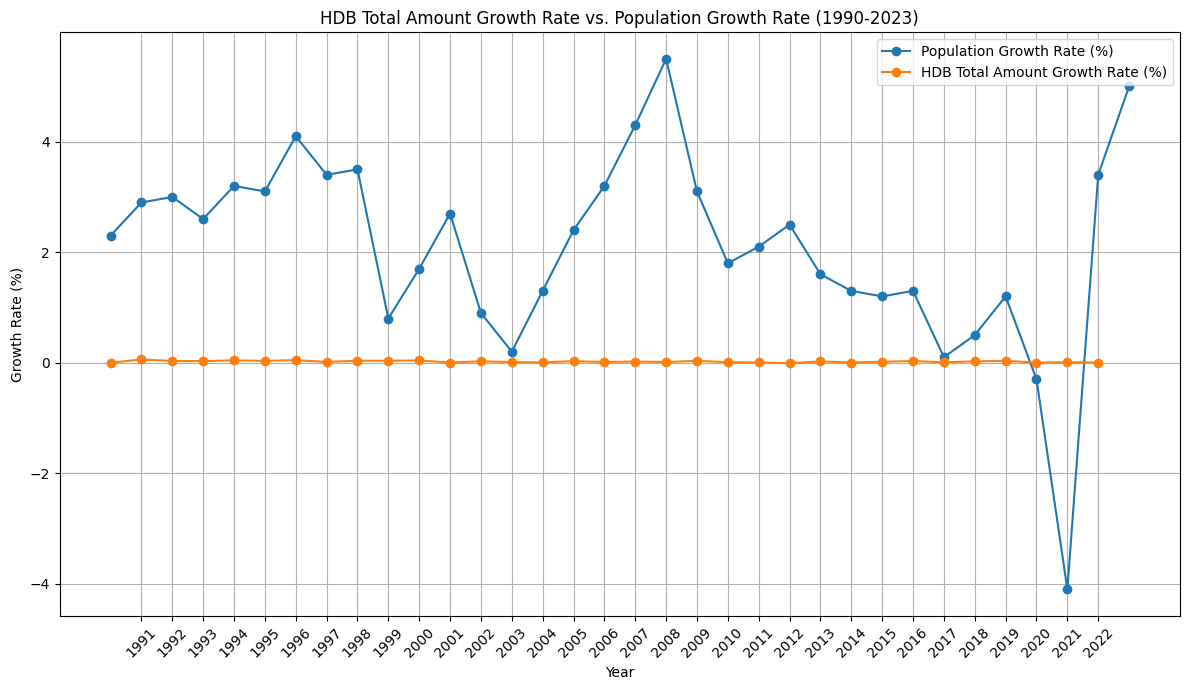

In [ ]:
# Trend Chart of Population Growth Rate and HDB Growth Rate.
plt.figure(figsize=(12, 7))

plt.plot(filtered_population_data_transposed["Year"], filtered_population_data_transposed["Total Population Growth (Per Cent)"].astype(float), label='Population Growth Rate (%)', marker='o', linestyle='-')
# plt.plot(filtered_population_data_transposed["Year"], filtered_population_data_transposed["Population Growth Rate Slope"].astype(float), label='Population Growth Rate (%)', marker='o', linestyle='-')

# plt.plot(resale_growth_rates.index.astype(int), resale_growth_rates.values, label='HDB Resale Growth Rate (%)', marker='o')
plt.plot(filtered_hdb_total_account_df_transposed_cp["Year"], filtered_hdb_total_account_df_transposed_cp['Total HDB Dwellings Growth Rate'], label='HDB Total Amount Growth Rate (%)', marker='o')

plt.title('HDB Total Amount Growth Rate vs. Population Growth Rate (1990-2023)')
plt.xlabel('Year')
plt.xticks(ticks=np.arange(min(resale_growth_rates.index), max(resale_growth_rates.index), 1.0))
plt.xticks(rotation=45)
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The trend between HDB's growth rate and population change is not apparent. Therefore, we use a regression model to identify the most significant variables affecting the HDB growth rate.

In [ ]:
# analyze the correlation between twon line
full_dt = filtered_population_data_transposed.merge(filtered_hdb_total_account_df_transposed_cp, left_on = "Year", right_on = "Year", how="outer")
full_dt = full_dt.dropna()
full_dt = full_dt.replace(',','', regex=True)
full_dt = full_dt.apply(pd.to_numeric)
full_dt.head()

Data Series  Year  Total Population (Number)  Resident Population (Number)  \
1            2022                    5637022                       4073239   
2            2021                    5453566                       3986842   
3            2020                    5685807                       4044210   
4            2019                    5703569                       4026209   
5            2018                    5638676                       3994283   

Data Series  Singapore Citizen Population (Number)  \
1                                          3553749   
2                                          3498191   
3                                          3523191   
4                                          3500940   
5                                          3471936   

Data Series  Permanent Resident Population (Number)  \
1                                            519490   
2                                            488651   
3                                            521019   
4                                            525269   
5                                            522347   

Data Series  Non-Resident Population (Number)  \
1                                     1563783   
2                                     1466724   
3                                     1641597   
4                                     1677360   
5                                     1644393   

Data Series  Total Population Growth (Per Cent)  \
1                                           3.4   
2                                          -4.1   
3                                          -0.3   
4                                           1.2   
5                                           0.5   

Data Series  Resident Population Growth (Per Cent)  \
1                                              2.2   
2                                             -1.4   
3                                              0.4   
4                                              0.8   
5                                              0.7   

Data Series  Population Density (Total Population Per Square Kilometre)  \
1                                                         7688            
2                                                         7485            
3                                                         7810            
4                                                         7866            
5                                                         7804            

Data Series  Sex Ratio (Males Per Thousand Females)  ...  Total HDB Dwellings  \
1                                               955  ...              1090100   
2                                               960  ...              1089100   
3                                               957  ...              1080100   
4                                               957  ...              1079200   
5                                               959  ...              1043300   

Data Series  HDB 1- And 2-Room Flats  HDB 3-Room Flats  HDB 4-Room Flats  \
1                              94200            241400            438800   
2                              92400            242800            437700   
3                              88800            242400            434300   
4                              85700            240000            436500   
5                              81400            233900            420800   

Data Series  HDB 5-Room And Executive Flats  \
1                                    315600   
2                                    316200   
3                                    314600   
4                                    317000   
5                                    307200   

Data Series  Condominiums And Other Apartments  Landed Properties  \
1                                       237500              68200   
2                                       229100              68500   
3                                       220100              684

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = full_dt.corr()

#Correlation with output variable
cor_target = abs(cor["Total HDB Dwellings Growth Rate"])

#Selecting highly correlated features
relevant_features = pd.DataFrame(cor_target[cor_target>0.6])
relevant_features.reset_index(inplace = True)
print(relevant_features)

relevant_features_names = list(relevant_features["Data Series"])
relevant_features_names.remove('Total HDB Dwellings Growth Rate')
relevant_dt = full_dt[relevant_features_names]

                                         Data Series  \
0             Permanent Resident Population (Number)   
1             Sex Ratio (Males Per Thousand Females)   
2                 Resident Natural Increase (Number)   
3  Rate Of Natural Increase (Per Thousand Residents)   
4                     HDB 5-Room And Executive Flats   
5                                  Landed Properties   
6                    Total HDB Dwellings Growth Rate   
7                                  Growth Rate Slope   

   Total HDB Dwellings Growth Rate  
0                         0.604920  
1                         0.606775  
2                         0.627468  
3                         0.640594  
4                         0.619403  
5                         0.626682  
6                         1.000000  
7                         0.678052  


<Figure size 1200x1000 with 0 Axes>

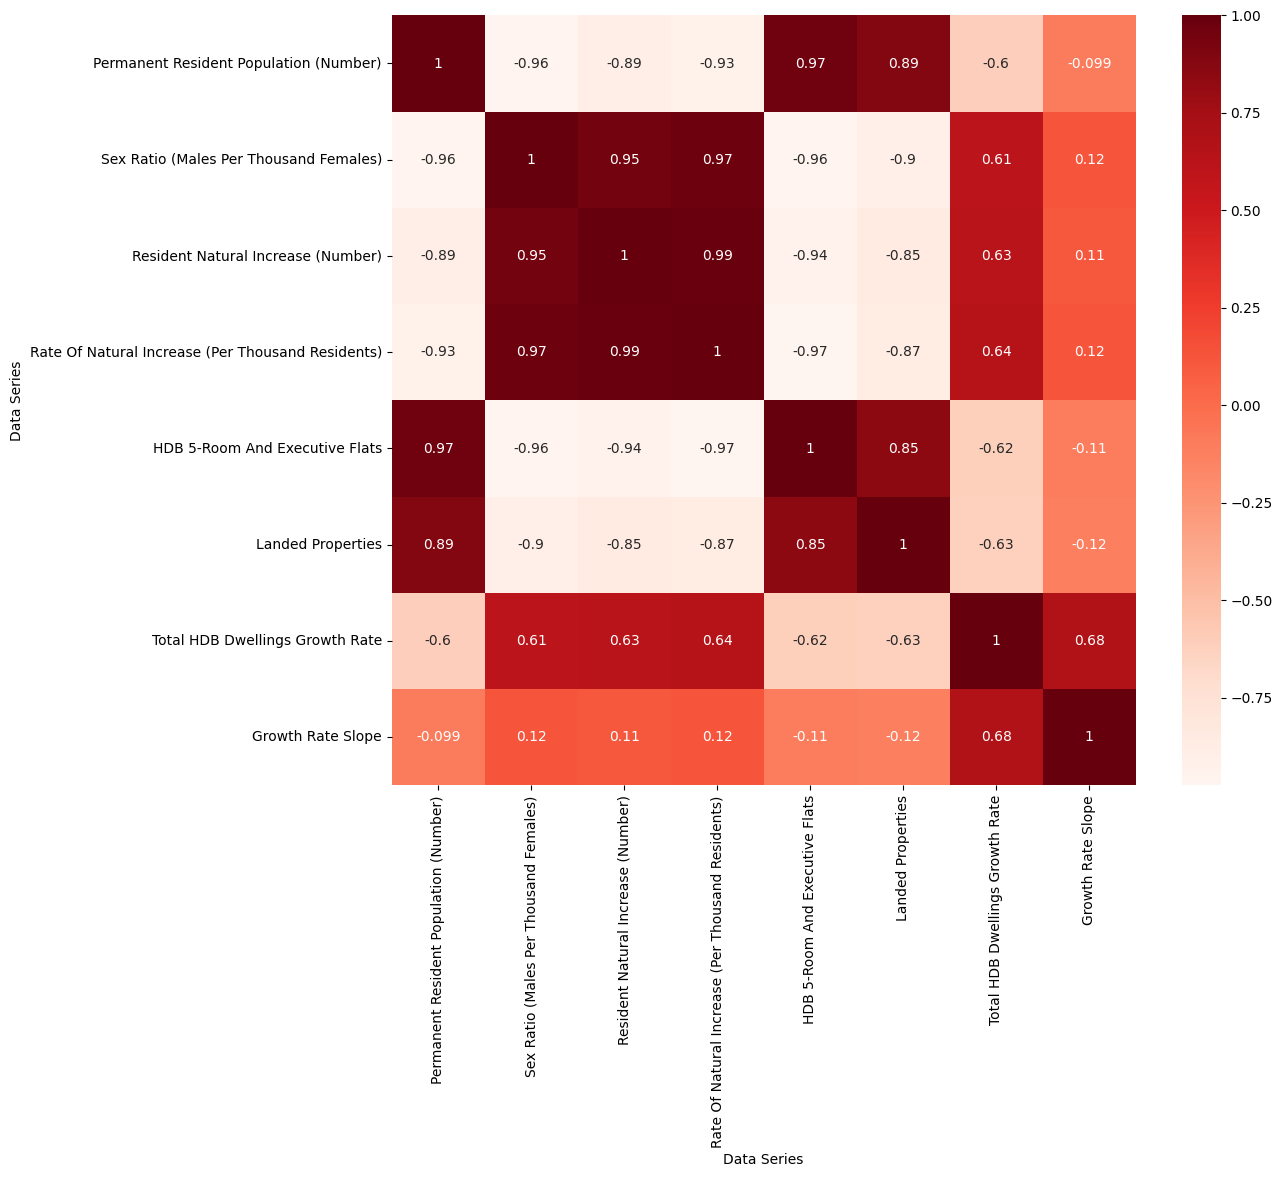

In [ ]:
name = list(relevant_features["Data Series"])
part_dt = full_dt.copy()
part_dt = part_dt[name]
plt.figure(figsize=(12,10))
cor2 = part_dt.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Construct a regression model to identify the most influential variables affecting the HDB growth rate.
from sklearn import preprocessing
full_nor = preprocessing.normalize(part_dt)
full_nor = pd.DataFrame(full_nor)
full_nor.columns = part_dt.columns
relevant_nor = preprocessing.normalize(relevant_dt)

y = np.array(full_nor["Total HDB Dwellings Growth Rate"])
x = np.array(relevant_nor)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"predicted response:\n{y_pred}")

r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

predicted response:
[ 1.63600145e-07  5.70445265e-08  1.42985445e-07  6.92140817e-08
  4.01588204e-09  4.77539169e-08  9.72374829e-08  7.79981659e-08
 -4.57815188e-09 -6.59709520e-09  3.14582568e-08]
coefficient of determination: 0.9665068495065847


In [ ]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9665068495065847


In [ ]:
print(f"intercept: {model.intercept_}")

for feature,coef in zip(relevant_features_names,model.coef_):
    print(f"{feature}: {coef:.10f}")

intercept: -6.162457000359609e-06
Permanent Resident Population (Number): 0.0000051886
Sex Ratio (Males Per Thousand Females): 0.0000068869
Resident Natural Increase (Number): -0.0000002208
Rate Of Natural Increase (Per Thousand Residents): 0.0066034797
HDB 5-Room And Executive Flats: 0.0000032563
Landed Properties: 0.0000004497
Growth Rate Slope: 0.5328387538


### Finding for Part 1:  
From both heatmap and the coefficients of the regression model,we can conclude that there is a positive relationship between the derivative of the population growth rate and the growth of HDB, see the high coefficient value of <span style='color: green'>Population Growth Rate Slope=0.5328</span>. That is, more HDB will be built when the population grow, indicating that the planning, development and construction of HDB flats take the factor of population growth into account, which also represents a balanced and sustainable response to population growth.

### Part 2 Relationship between economic growth, household income and HDB resale price
In this part we will explore the relationship between economic growth, household income and HDB resale price.     

In [ ]:
import requests
api_key = 'ICAG93159EZ5HYBZ'

# Define the base currency (USD) and target currency (SGD)
# find the exchange rate of USD and SGD
base_currency = 'USD'
target_currency = 'SGD'

endpoint_2 = f"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={base_currency}&to_currency={target_currency}&apikey={api_key}"

# Send a GET request to the API
response_2 = requests.get(endpoint_2, headers={"apikey": api_key})

if response_2.status_code == 200:
    currency = response_2.json()
    exchange_rate = float(currency['Realtime Currency Exchange Rate']['5. Exchange Rate'])
    print(f"{base_currency} to {target_currency} exchange rate: {exchange_rate}")
else:
    print("Failed to retrieve exchange rate data")


USD to SGD exchange rate: 1.3611


In [ ]:
endpoint_1 = "https://api.worldbank.org/v2/country/SGP/indicator/NY.GDP.PCAP.CD?format=json"

# Get the data from the API.
response_1 = requests.get(endpoint_1)
# Check if the request was successful
if response_1.status_code == 200 :
    # Parse the JSON response.
    json_data_1 = response_1.json()

    # Extract the GDP per capita data for both countries
    sgp_values = json_data_1[1]

    # Convert the JSON data into a Pandas DataFrame.
    sgp_df = pd.DataFrame(sgp_values, columns=['countryiso3code','date', 'value'])
    sgp_df.rename(columns= {'countryiso3code': 'country','date': 'year','value': 'GDP_per_Capita'}, inplace=True)
    sgp_df['GDP_per_Capita'] = (sgp_df['GDP_per_Capita'] * exchange_rate).round(2)
    sgp_df = sgp_df.sort_values(by='year')
    sgp_df = sgp_df.iloc[17:]
    sgp_df.reset_index(drop=True, inplace=True)

    print(sgp_df)

else:
    print("Failed to retrieve GDP per capita data from the World Bank API")

   country  year  GDP_per_Capita
0      SGP  1991        19739.19
1      SGP  1992        21963.04
2      SGP  1993        24894.70
3      SGP  1994        29334.99
4      SGP  1995        33911.60
5      SGP  1996        35705.55
6      SGP  1997        35900.19
7      SGP  1998        29711.82
8      SGP  1999        29667.40
9      SGP  2000        32466.10
10     SGP  2001        29535.52
11     SGP  2002        30161.75
12     SGP  2003        32299.43
13     SGP  2004        37577.36
14     SGP  2005        40780.35
15     SGP  2006        45962.24
16     SGP  2007        53672.10
17     SGP  2008        54455.67
18     SGP  2009        52983.27
19     SGP  2010        64293.85
20     SGP  2011        73351.66
21     SGP  2012        75605.78
22     SGP  2013        77538.36
23     SGP  2014        78351.45
24     SGP  2015        75739.24
25     SGP  2016        77440.68
26     SGP  2017        83251.54
27     SGP  2018        90971.19
28     SGP  2019        89928.54
29     SGP

In [ ]:
# filter the data from 1990 to 2022
filtered_data = data_df[(data_df['year'] >= 1990) & (data_df['year'] <= 2022)]
# calculate the mean resale price of each year
mean_resale_prices = filtered_data.groupby('year')['resale_price'].mean().round(2)
mean_resale_prices = mean_resale_prices.reset_index()

print(mean_resale_prices)

    year  resale_price
0   1990      68086.14
1   1991      73588.94
2   1992      84372.64
3   1993     132807.72
4   1994     172619.53
5   1995     212122.10
6   1996     279282.34
7   1997     308213.92
8   1998     257637.91
9   1999     252302.74
10  2000     258056.84
11  2001     243469.60
12  2002     234834.03
13  2003     231343.01
14  2004     235169.37
15  2005     234165.11
16  2006     236079.49
17  2007     262276.61
18  2008     317141.87
19  2009     337913.31
20  2010     379939.44
21  2011     425382.30
22  2012     461492.57
23  2013     476441.01
24  2014     442716.05
25  2015     434709.56
26  2016     438838.96
27  2017     443888.52
28  2018     441282.06
29  2019     432137.91
30  2020     452279.38
31  2021     511385.58
32  2022     549714.33


c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_

Text(0, 0.5, '$SGD')

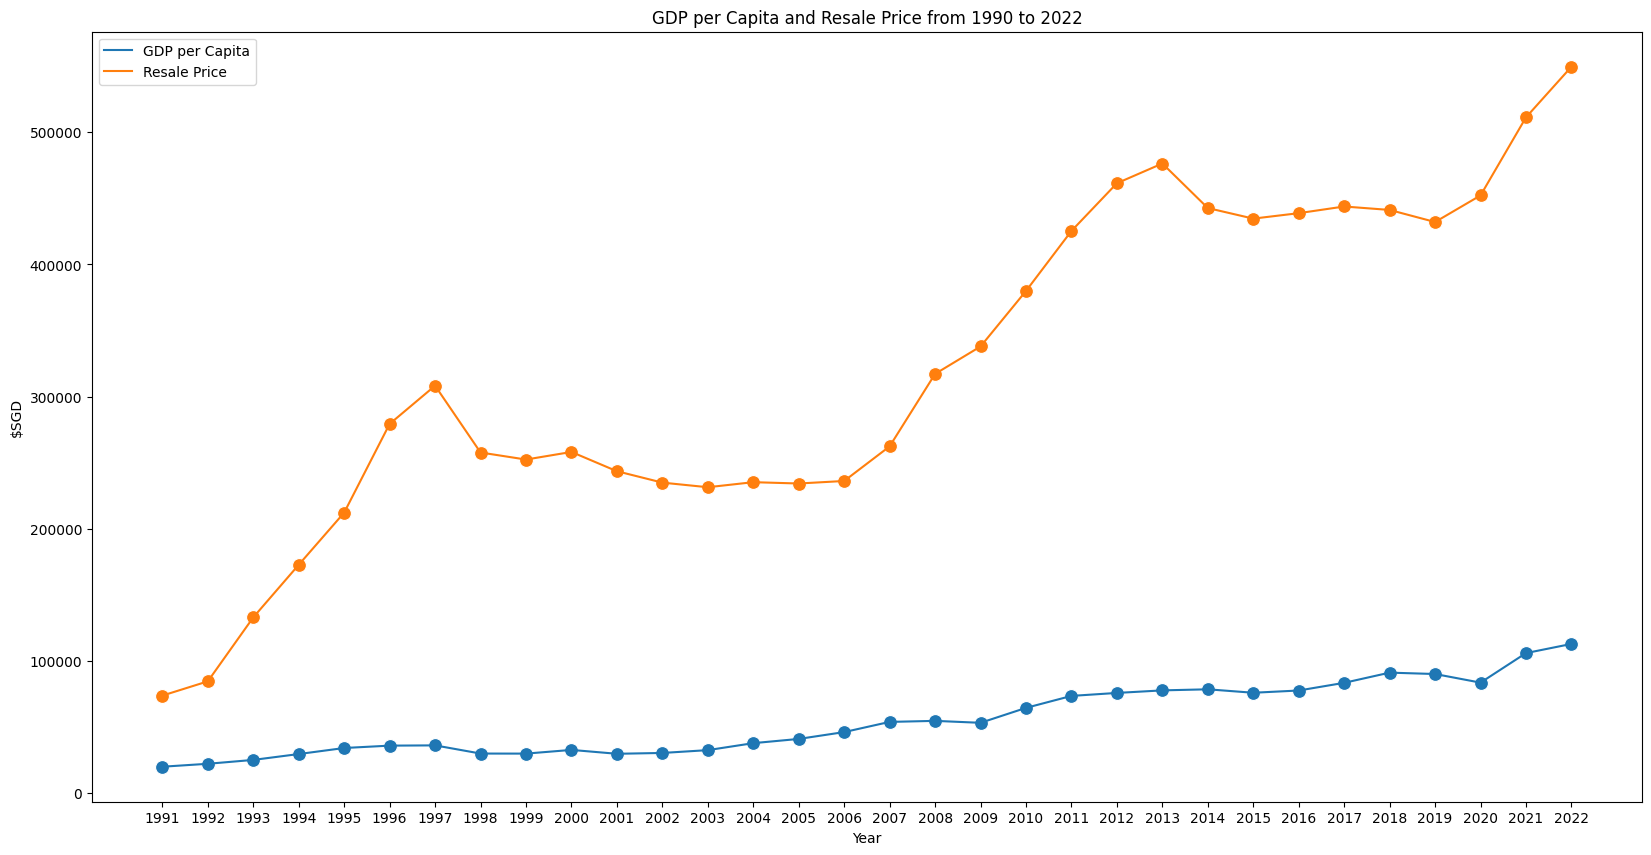

In [ ]:
# change the type of year to str
sgp_df['year'] = sgp_df['year'].astype(str)
mean_resale_prices['year'] = mean_resale_prices['year'].astype(str)
# combine the two datasets
combined_df = pd.merge(sgp_df, mean_resale_prices, on='year', how='inner')

plt.figure(figsize=(20, 10))

sns.lineplot(data=combined_df, x='year', y='GDP_per_Capita', label='GDP per Capita')
sns.lineplot(data=combined_df, x='year', y='resale_price', label='Resale Price')

sns.scatterplot(data=combined_df, x='year', y='GDP_per_Capita', s=100)
sns.scatterplot(data=combined_df, x='year', y='resale_price', s=100)


plt.title('GDP per Capita and Resale Price from 1990 to 2022')
plt.xlabel('Year')
plt.ylabel('$SGD')

The trend of resale price and GDP per capita is not very clear due to the scale of these two dataset, so we try to visualize the trend using two axes.

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_

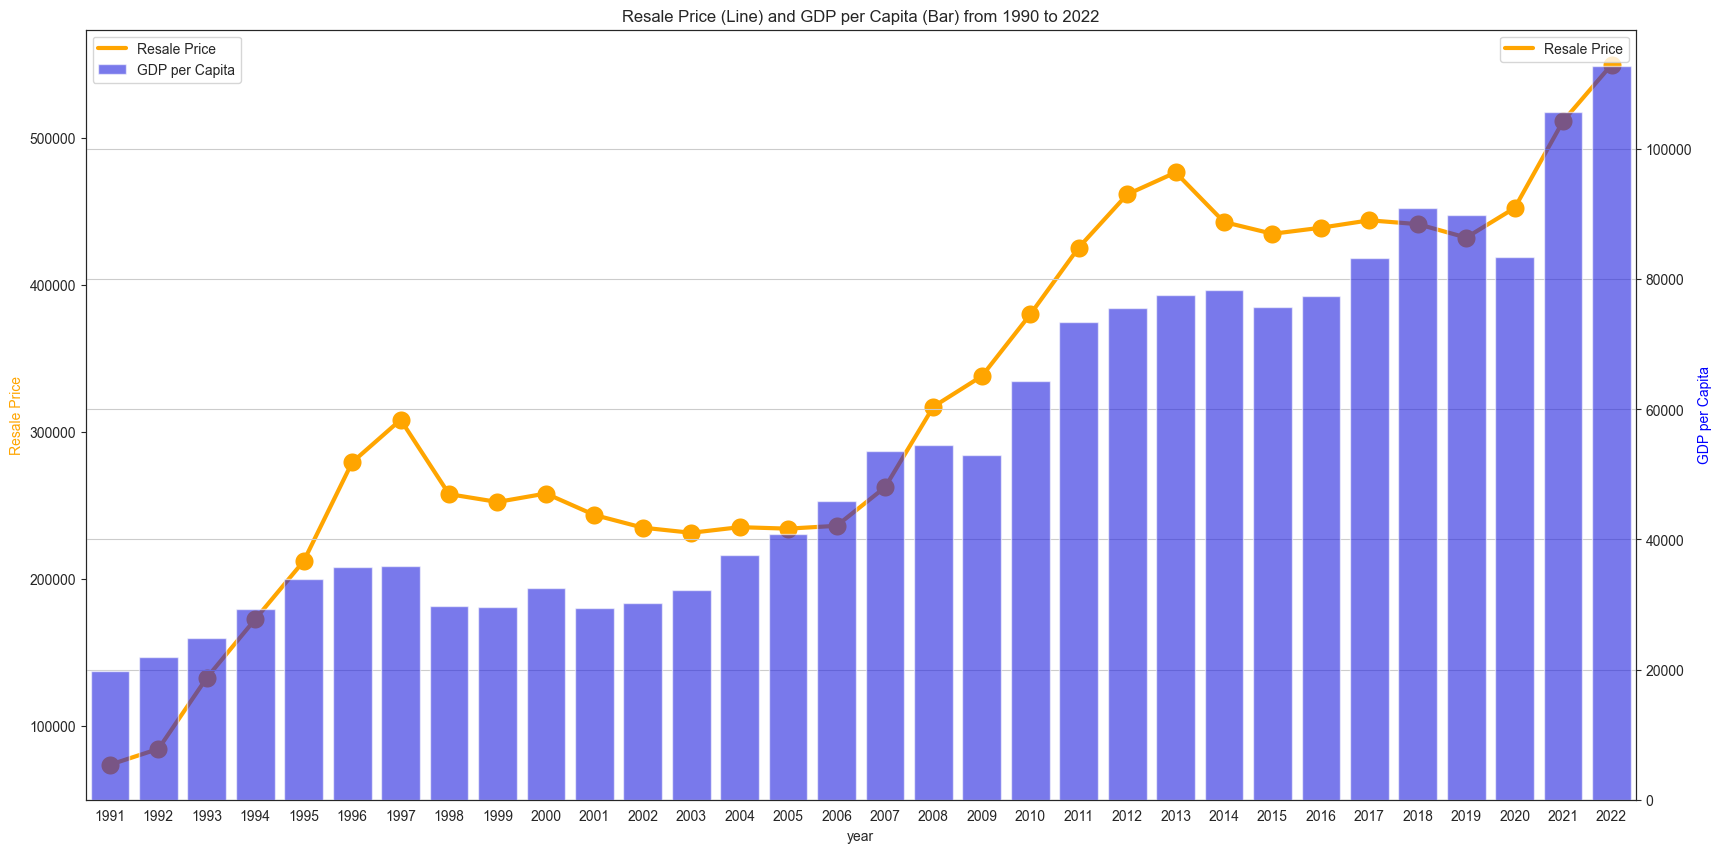

In [ ]:
# Change the 'year' column to a string data type if necessary
sgp_df['year'] = sgp_df['year'].astype(str)
mean_resale_prices['year'] = mean_resale_prices['year'].astype(str)

# Combine the two datasets
combined_df = pd.merge(sgp_df, mean_resale_prices, on='year', how='inner')

# Create a figure and two axes using Seaborn
sns.set_style("white")
plt.figure(figsize=(20, 10))

# Create the left y-axis for Resale Price (lineplot)
ax1 = sns.lineplot(data=combined_df, x='year', y='resale_price', color='orange', linewidth='3', label='Resale Price')
sns.scatterplot(data=combined_df, x='year', y='resale_price', color='orange', s=200)

# Create the right y-axis for GDP per Capita (barplot)
ax2 = ax1.twinx()
sns.barplot(data=combined_df, x='year', y='GDP_per_Capita', color='blue', label='GDP per Capita', alpha=0.6)

# Set labels, title, and legends
plt.title('Resale Price (Line) and GDP per Capita (Bar) from 1990 to 2022')
plt.xlabel('Year')
ax1.set_ylabel('Resale Price', color='orange')
ax2.set_ylabel('GDP per Capita', color='blue')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
bars, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + bars, labels + labels2, loc='upper left')

plt.grid(True)
plt.show()


The trend in resale price and GDP are very similar, which means as the economy grows, housing prices is also increasing. This may raise another question:<span style='color: green'> whether the housing prices are increasing too fast that the residents can hardly afford?</span>     
In order to figure out the answer of this question, we will examine the ratio of residents' disposable income to housing prices.

In [ ]:
#get average price_per_sqm by years
avg_resale_price_by_year = data_df.groupby('year')['price_per_sqm'].mean().reset_index()
avg_resale_price_by_year['price_per_sqm'] = round(avg_resale_price_by_year['price_per_sqm'], 1)
avg_resale_price_by_year.rename(columns = {'price_per_sqm': 'avg_price_per_sqm', 'year': 'Year'}, inplace=True)
#get median price_per_sqm by years
mid_resale_price_by_year = data_df.groupby('year')['price_per_sqm'].median().reset_index()
mid_resale_price_by_year['price_per_sqm'] = round(mid_resale_price_by_year['price_per_sqm'], 1)
mid_resale_price_by_year.rename(columns = {'price_per_sqm': 'mid_price_per_sqm', 'year': 'Year'}, inplace=True)
#get average resale price by years
avg_total_price_by_year = data_df.groupby('year')['resale_price'].mean().reset_index()
avg_total_price_by_year['resale_price'] = round(avg_total_price_by_year['resale_price'], 1)
avg_total_price_by_year.rename(columns = {'resale_price': 'avg_total_price', 'year': 'Year'}, inplace=True)
#get median resale price by years
mid_total_price_by_year = data_df.groupby('year')['resale_price'].median().reset_index()
mid_total_price_by_year['resale_price'] = round(mid_total_price_by_year['resale_price'], 1)
mid_total_price_by_year.rename(columns = {'resale_price': 'mid_total_price', 'year': 'Year'}, inplace=True)


In [ ]:
# the dataset comes from https://tablebuilder.singstat.gov.sg/table/TS/M016081
path = "data/17790.csv"
household_info = pd.read_csv(path, encoding='utf-8').sort_values(by='Year').reset_index(drop=True)
household_info

Year  Resident_Households_Average  Resident_Households_Median  \
0   2000                         5436                        4000   
1   2001                         5972                        4363   
2   2002                         5667                        4096   
3   2003                         5670                        4071   
4   2004                         5666                        4066   
5   2005                         5934                        4270   
6   2006                         6181                        4430   
7   2007                         6790                        4846   
8   2008                         7691                        5492   
9   2009                         7410                        5360   
10  2010                         7812                        5600   
11  2011                         8722                        6307   
12  2012                         9394                        6772   
13  2013                         9481                        7030   
14  2014                         9982                        7320   
15  2015                        10394                        7733   
16  2016                        10336                        7748   
17  2017                        10610                        7850   
18  2018                        10664                        7955   
19  2019                        10750                        7981   
20  2020                        10608                        7744   
21  2021                        10832                        8220   
22  2022                        11480                        8615   

    Resident_Employed_Households_Average  Resident_Employed_Households_Median  
0                                   5947                                 4398  
1                                   6417                                 4716  
2                                   6229                                 4590  
3                                   6276                                 4612  
4                                   6285                                 4552  
5                                   6593                                 4831  
6                                   6792                                 4952  
7                                   7431                                 5362  
8                                   8414                                 6100  
9                                   8195                                 6006  
10                                  8726                                 6342  
11                                  9618                                 7037  
12                                 10348                                 7566  
13                                 10469                                 7872  
14                                 11143                                 8292  
15                                 11510                                 8666  
16                                 11589                                 8846  
17                                 12027                                 9023  
18                                 12137                                 9293  
19                                 12386                                 9425  
20                                 12235                                 9189  
21                                 12276                                 9520  
22                                 13124                                10099

In [ ]:
household_info_avg = household_info[['Year', 'Resident_Households_Average', 'Resident_Employed_Households_Average']]

household_info_mid = household_info[['Year', 'Resident_Households_Median', 'Resident_Employed_Households_Median']]
# convert monthly income to annually
household_info_avg['Resident_Employed_Households_Average'] = household_info_avg['Resident_Employed_Households_Average'] * 12
household_info_avg['Resident_Households_Average'] = household_info_avg['Resident_Households_Average'] * 12

household_info_mid['Resident_Employed_Households_Median'] = household_info_mid['Resident_Employed_Households_Median'] * 12
household_info_mid['Resident_Households_Median'] = household_info_mid['Resident_Households_Median'] * 12
household_info_avg.head()

C:\Users\TristanTong\AppData\Local\Temp\ipykernel_19944\3954668331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_info_avg['Resident_Employed_Households_Average'] = household_info_avg['Resident_Employed_Households_Average'] * 12
C:\Users\TristanTong\AppData\Local\Temp\ipykernel_19944\3954668331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_info_avg['Resident_Households_Average'] = household_info_avg['Resident_Households_Average'] * 12
C:\Users\TristanTong\AppData\Local\Temp\ip

Year  Resident_Households_Average  Resident_Employed_Households_Average
0  2000                        65232                                 71364
1  2001                        71664                                 77004
2  2002                        68004                                 74748
3  2003                        68040                                 75312
4  2004                        67992                                 75420

In [ ]:
# inner join on year
avg_income_and_resale_price = pd.merge(household_info_avg, avg_resale_price_by_year, on='Year', how='inner')
mid_income_and_resale_price = pd.merge(household_info_mid, mid_resale_price_by_year, on='Year', how='inner')
income_and_resale_price = pd.merge(avg_income_and_resale_price.reset_index(drop=True), mid_income_and_resale_price.reset_index(drop=True),
                                   on='Year', how='inner')
income_and_resale_price = pd.merge(income_and_resale_price.reset_index(drop=True), avg_total_price_by_year.reset_index(drop=True),
                                   on='Year', how='inner')
income_and_resale_price = pd.merge(income_and_resale_price.reset_index(drop=True), mid_total_price_by_year.reset_index(drop=True),
                                   on='Year', how='inner')
income_and_resale_price.head()

Year  Resident_Households_Average  Resident_Employed_Households_Average  \
0  2000                        65232                                 71364   
1  2001                        71664                                 77004   
2  2002                        68004                                 74748   
3  2003                        68040                                 75312   
4  2004                        67992                                 75420   

   avg_price_per_sqm  Resident_Households_Median  \
0             2608.5                       48000   
1             2418.5                       52356   
2             2339.8                       49152   
3             2410.3                       48852   
4             2517.3                       48792   

   Resident_Employed_Households_Median  mid_price_per_sqm  avg_total_price  \
0                                52776             2542.5         258056.8   
1                                56592             2351.6         243469.6   
2                                55080             2279.3         234834.0   
3                                55344             2376.2         231343.0   
4                                54624             2476.6         235169.4   

   mid_total_price  
0         239000.0  
1         225000.0  
2         215000.0  
3         217000.0  
4         223500.0

In [ ]:
# compute ratio
income_and_resale_price['Ratio_of_house_price_to_income_Employed_avg'] = \
round(income_and_resale_price['Resident_Employed_Households_Average'] / income_and_resale_price['avg_price_per_sqm'], 1)
income_and_resale_price['Ratio_of_house_price_to_income_avg'] = \
round(income_and_resale_price['Resident_Households_Average'] / income_and_resale_price['avg_price_per_sqm'], 1)

income_and_resale_price['Ratio_of_house_price_to_income_Employed_mid'] = \
round(income_and_resale_price['Resident_Employed_Households_Median'] / income_and_resale_price['mid_price_per_sqm'], 1)
income_and_resale_price['Ratio_of_house_price_to_income_mid'] = \
round(income_and_resale_price['Resident_Households_Median'] / income_and_resale_price['mid_price_per_sqm'], 1)

income_and_resale_price['Ratio_of_total_price_to_income_Employed_avg'] = \
round(income_and_resale_price['avg_total_price'] / income_and_resale_price['Resident_Employed_Households_Average'], 1)
income_and_resale_price['Ratio_of_total_price_to_income_avg'] = \
round(income_and_resale_price['avg_total_price'] / income_and_resale_price['Resident_Households_Average'], 1)

income_and_resale_price['Ratio_of_total_price_to_income_Employed_mid'] = \
round(income_and_resale_price['mid_total_price'] / income_and_resale_price['Resident_Employed_Households_Median'], 1)
income_and_resale_price['Ratio_of_total_price_to_income_mid'] = \
round(income_and_resale_price['mid_total_price'] / income_and_resale_price['Resident_Households_Median'], 1)

income_and_resale_price.head()

Year  Resident_Households_Average  Resident_Employed_Households_Average  \
0  2000                        65232                                 71364   
1  2001                        71664                                 77004   
2  2002                        68004                                 74748   
3  2003                        68040                                 75312   
4  2004                        67992                                 75420   

   avg_price_per_sqm  Resident_Households_Median  \
0             2608.5                       48000   
1             2418.5                       52356   
2             2339.8                       49152   
3             2410.3                       48852   
4             2517.3                       48792   

   Resident_Employed_Households_Median  mid_price_per_sqm  avg_total_price  \
0                                52776             2542.5         258056.8   
1                                56592             2351.6         243469.6   
2                                55080             2279.3         234834.0   
3                                55344             2376.2         231343.0   
4                                54624             2476.6         235169.4   

   mid_total_price  Ratio_of_house_price_to_income_Employed_avg  \
0         239000.0                                         27.4   
1         225000.0                                         31.8   
2         215000.0                                         31.9   
3         217000.0                                         31.2   
4         223500.0                                         30.0   

   Ratio_of_house_price_to_income_avg  \
0                                25.0   
1                                29.6   
2                                29.1   
3                                28.2   
4                                27.0   

   Ratio_of_house_price_to_income_Employed_mid  \
0                                         20.8   
1                                         24.1   
2                                         24.2   
3                                         23.3   
4                                         22.1   

   Ratio_of_house_price_to_income_mid  \
0                                18.9   
1                                22.3   
2                                21.6   
3                                20.6   
4                                19.7   

   Ratio_of_total_price_to_income_Employed_avg  \
0                                          3.6   
1                                          3.2   
2                                          3.1   
3                                          3.1   
4                                          3.1   

   Ratio_of_total_price_to_income_avg  \
0                                 4.0   
1                                 3.4   
2                                 3.5   
3                                 3.4   
4                                 3.5   

   Ratio_of_total_price_to_income_Employed_mid  \
0                                          4.5   
1                                          4.0   
2                                          3.9   
3                                          3.9   
4                                          4.1   

   Ratio_of_total_price_to_income_mid  
0                                 5.0  
1                                 4.3  
2                                 4.4  
3                                 4.4  
4                                 4.6

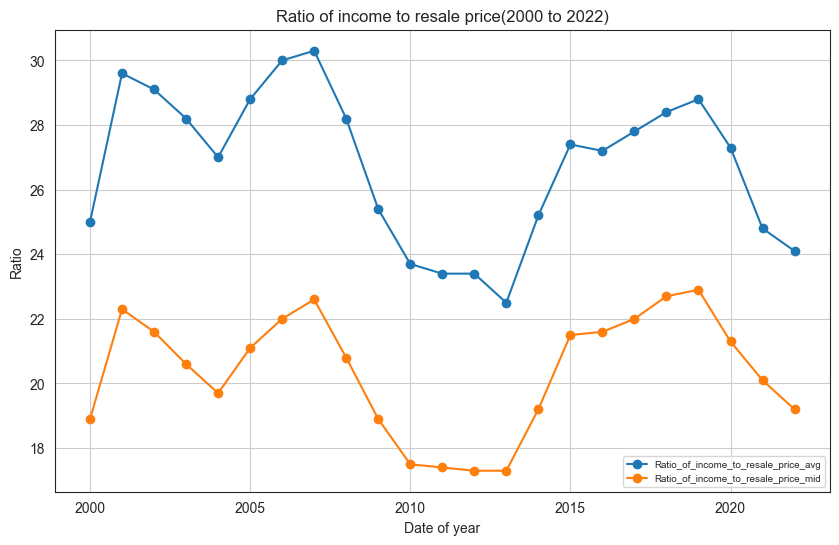

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_house_price_to_income_Employed_avg'],
#        label='Ratio_of_income_to_resale_price_Employed_avg', marker='o', linestyle='-')
ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_house_price_to_income_avg'],
        label='Ratio_of_income_to_resale_price_avg', marker='o', linestyle='-')
#ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_house_price_to_income_Employed_mid'],
#       label='Ratio_of_income_to_resale_price_Employed_mid', marker='o', linestyle='-')
ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_house_price_to_income_mid'],
        label='Ratio_of_income_to_resale_price_mid', marker='o', linestyle='-')



ax.set_title('Ratio of income to resale price(2000 to 2022)')
ax.set_xlabel('Date of year')
ax.set_ylabel('Ratio')
ax.grid()
ax.legend(loc='lower right', fontsize=7)
plt.show()

The ratio of income to resale price(per sqm) reveal how many sqms a family can buy with annual income. The higher value of the ratio indicates a higher buying power.

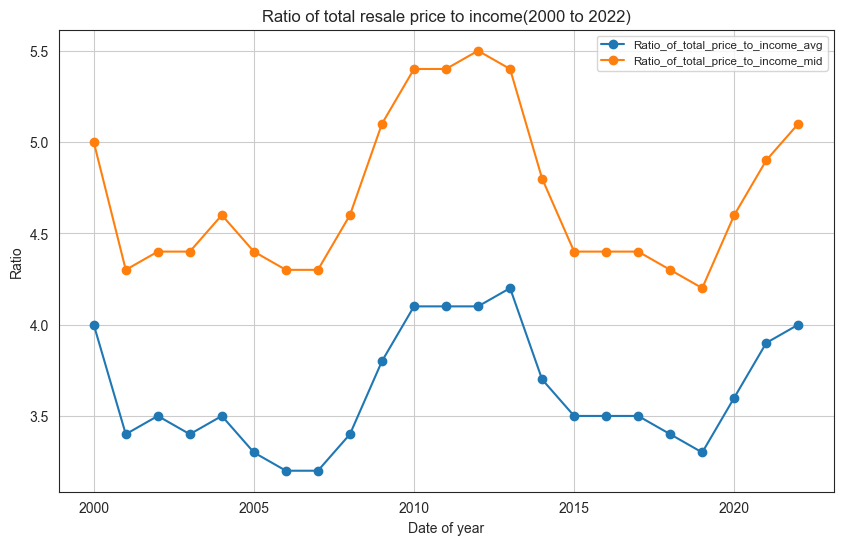

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_total_price_to_income_Employed_avg'],
#        label='Ratio_of_total_price_to_income_Employed_avg', marker='o', linestyle='-')
ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_total_price_to_income_avg'],
        label='Ratio_of_total_price_to_income_avg', marker='o', linestyle='-')
#ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_total_price_to_income_Employed_mid'],
#        label='Ratio_of_total_price_to_income_Employed_mid', marker='o', linestyle='-')
ax.plot(income_and_resale_price['Year'], income_and_resale_price['Ratio_of_total_price_to_income_mid'],
        label='Ratio_of_total_price_to_income_mid', marker='o', linestyle='-')

ax.set_title('Ratio of total resale price to income(2000 to 2022)')
ax.set_xlabel('Date of year')
ax.set_ylabel('Ratio')
ax.grid()
ax.legend(loc='upper right', fontsize='small')
plt.show()

### Finding for Part 2:  
 The line graph showed above demonstrate the ratio of HDB resale price to household income, fluctuating from 2000 to 2022. A higher ratio indicates a lower buying power. We can infer from the graph above that the lowest buying power can be witnessed from 2010 to 2013 because the ratio in that period was the highest.By searching information from the Internet, we uncovered some relevant factors which supported that fluctuation such as the Government policy on house price control.         
"The Government announced on 11 Jan 2013 a set of measures to cool the residential property market. This includes an increase in the Additional Buyer’s Stamp Duty (ABSD) of five to seven percentage points across the board effective from 12 Jan 2013."         
https://www.ura.gov.sg/Corporate/Guidelines/Circulars/coh13-01      
These measures did take effects and cooled the housing market of Singapore.So we can derive the conclusion that the housing sector maintains a stable state despite the overheated trends in the real estate market with the development fo economy.This represents Singapore has maintained sustainable development of housing sector and fulfilled its commitment to "Providing Homes for All".

### Part 3 Relation between HDB Flat Types and Resale Prices
In this part, we will first explore the trend of flat type, average HDB resale price and average resale price of per square meter.   
Then we will plot the graph to show the distribution of HDB of different flat type and room area.  

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

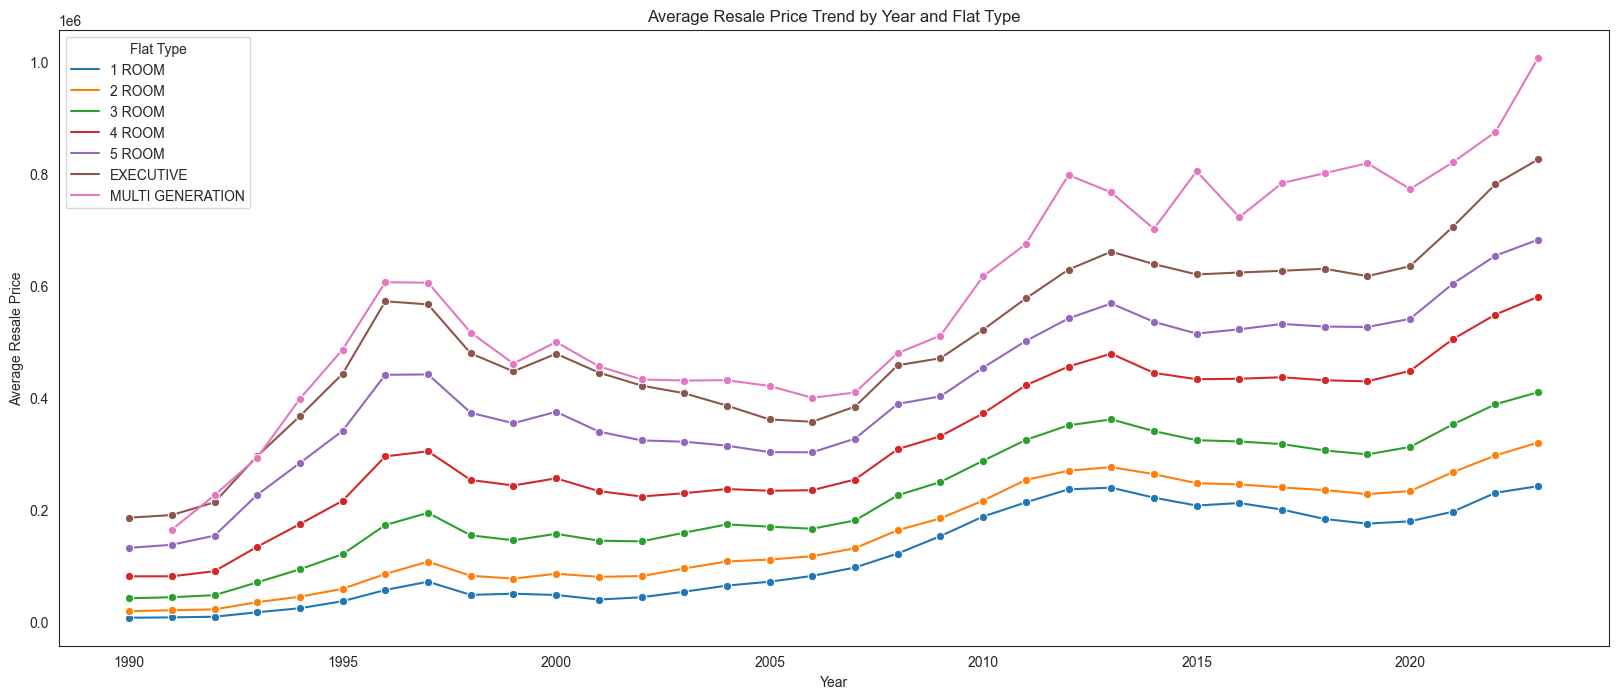

In [ ]:
df_flat = data_df.copy()
df_flat['flat_type'] = df_flat['flat_type'].str.replace('-',' ')

# groupby "year" and "flat_type" and calculate the avg price
flat_grouped = df_flat.groupby(['year', 'flat_type'])['resale_price'].mean().reset_index()

plt.figure(figsize=(20, 8))
sns.lineplot(data=flat_grouped, x='year', y='resale_price', hue='flat_type', marker='o', palette='tab10')
plt.title('Average Resale Price Trend by Year and Flat Type')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.legend(title='Flat Type')
plt.show()

We can observe from the chart that the resale price of different flat type nearly have same trend over the years. Yet, the multi generation type has experienced more obvious fluctuation than other flat type, because of its limited availability and consequently lower transaction volumes.

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

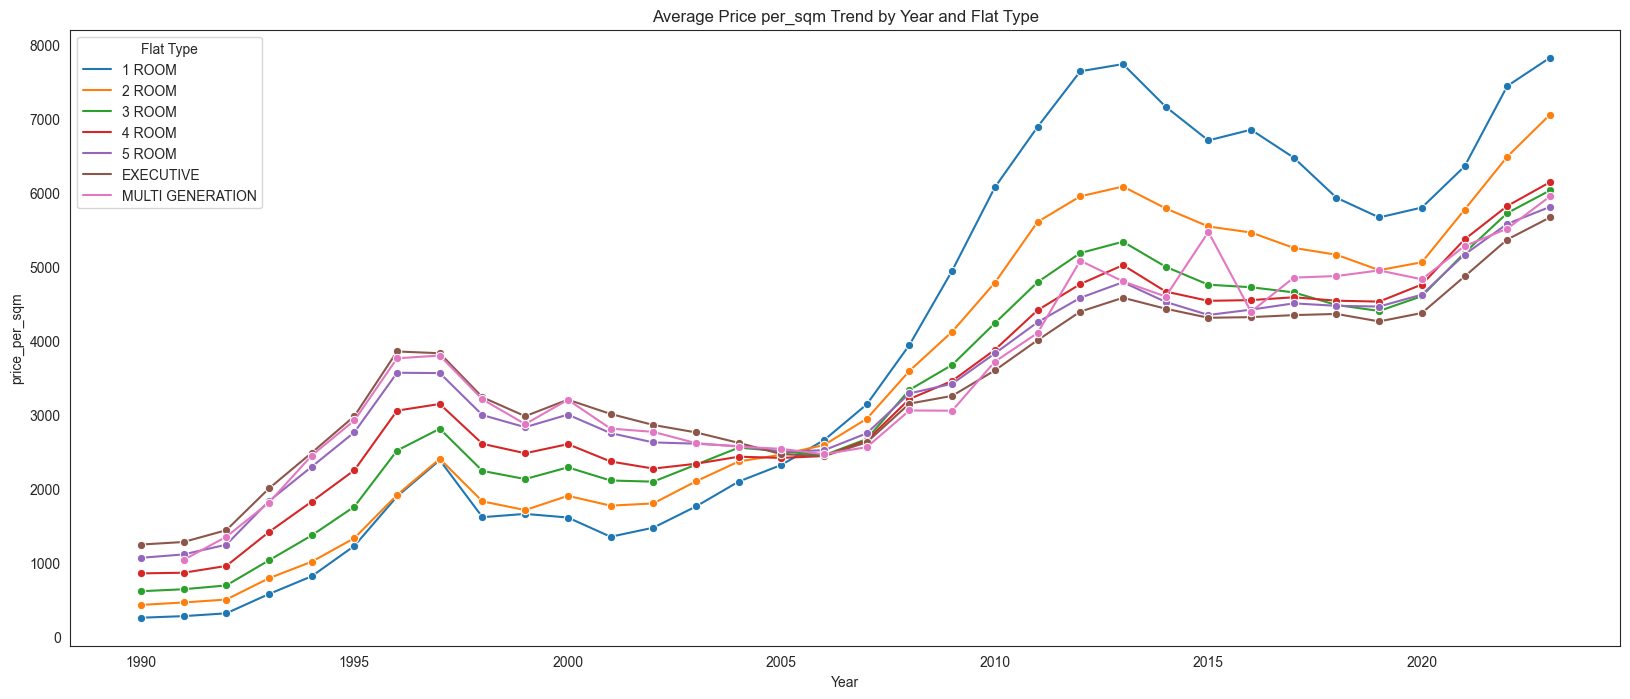

In [ ]:
flat_grouped_per_sqm = df_flat.groupby(['year', 'flat_type'])['price_per_sqm'].mean().reset_index()

plt.figure(figsize=(20, 8))
sns.lineplot(data=flat_grouped_per_sqm, x='year', y='price_per_sqm', hue='flat_type', marker='o', palette='tab10')
plt.title('Average Price per_sqm Trend by Year and Flat Type')
plt.xlabel('Year')
plt.ylabel('price_per_sqm')
plt.legend(title='Flat Type')
plt.show()

From this picture, we can discover that before 2006 price per sqm was in proportion to the room that house had, which meant that 1 room flat had the loweset price per square meter. The more rooms the house had, the higher the price per square meter. While, since 2006, this relationship has shifted to the opposite. The smaller one with 1 or 2 rooms become less economic. The avarage prices per sqm for houses with more than 2 rooms are nearly similar and are of lower price than homes with fewer rooms.     
With the develop of economy and taking demographic structure of Singaporean families,the need to live in homes with more rooms is increasing. Recognizing this trend, the Singapore government has taken several measures, like "Proximity Housing Grant", to encourage families to purchase larger homes.

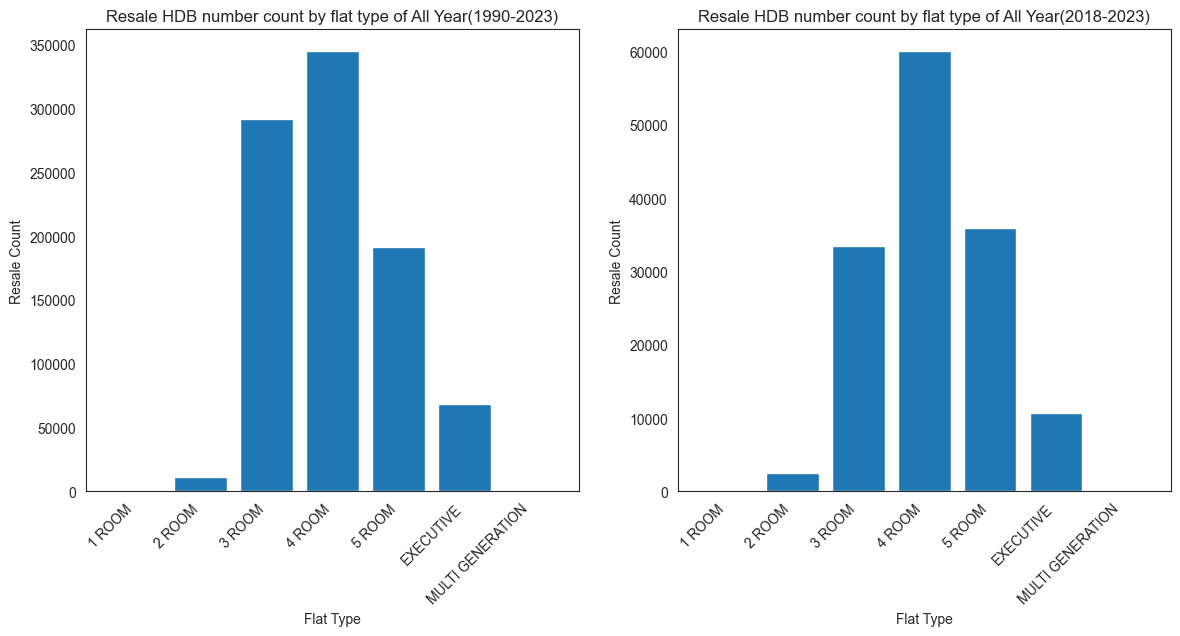

In [ ]:
df_flat_18_23 = df_flat[(df_flat['year']>=2018)&(df_flat['year']<=2023)]
flat_count_all_year = df_flat.groupby('flat_type').size().reset_index(name='count')
flat_count_18_23 = df_flat_18_23.groupby('flat_type').size().reset_index(name='count')

# plot the bar chart
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)  # 1 row 2 columns the first graph
plt.bar(flat_count_all_year['flat_type'],flat_count_all_year['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Flat Type')
plt.ylabel('Resale Count')
plt.title('Resale HDB number count by flat type of All Year(1990-2023)')

plt.subplot(1, 2, 2)  # 1 row 2 columns the second graph
plt.bar(flat_count_18_23['flat_type'],flat_count_18_23['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Flat Type')
plt.ylabel('Resale Count')
plt.title('Resale HDB number count by flat type of All Year(2018-2023)')
plt.show()

This distribution graph of flat type could also indicate the trend that Singaporean families are preferring houses with more rooms.   
Under the guidance and planning of the Singapore government, this shift to houses with more rooms reflects the commitment of the government to practicing sustainability in housing scetor.    
For one thing, multi-genaration living could not only lead to more efficient use of space, but also could facilitate the close relationship among family members. For another, living in the same house means they could share resources,such as appliances and utilities, which can bring about lower combined carbon footprint.    

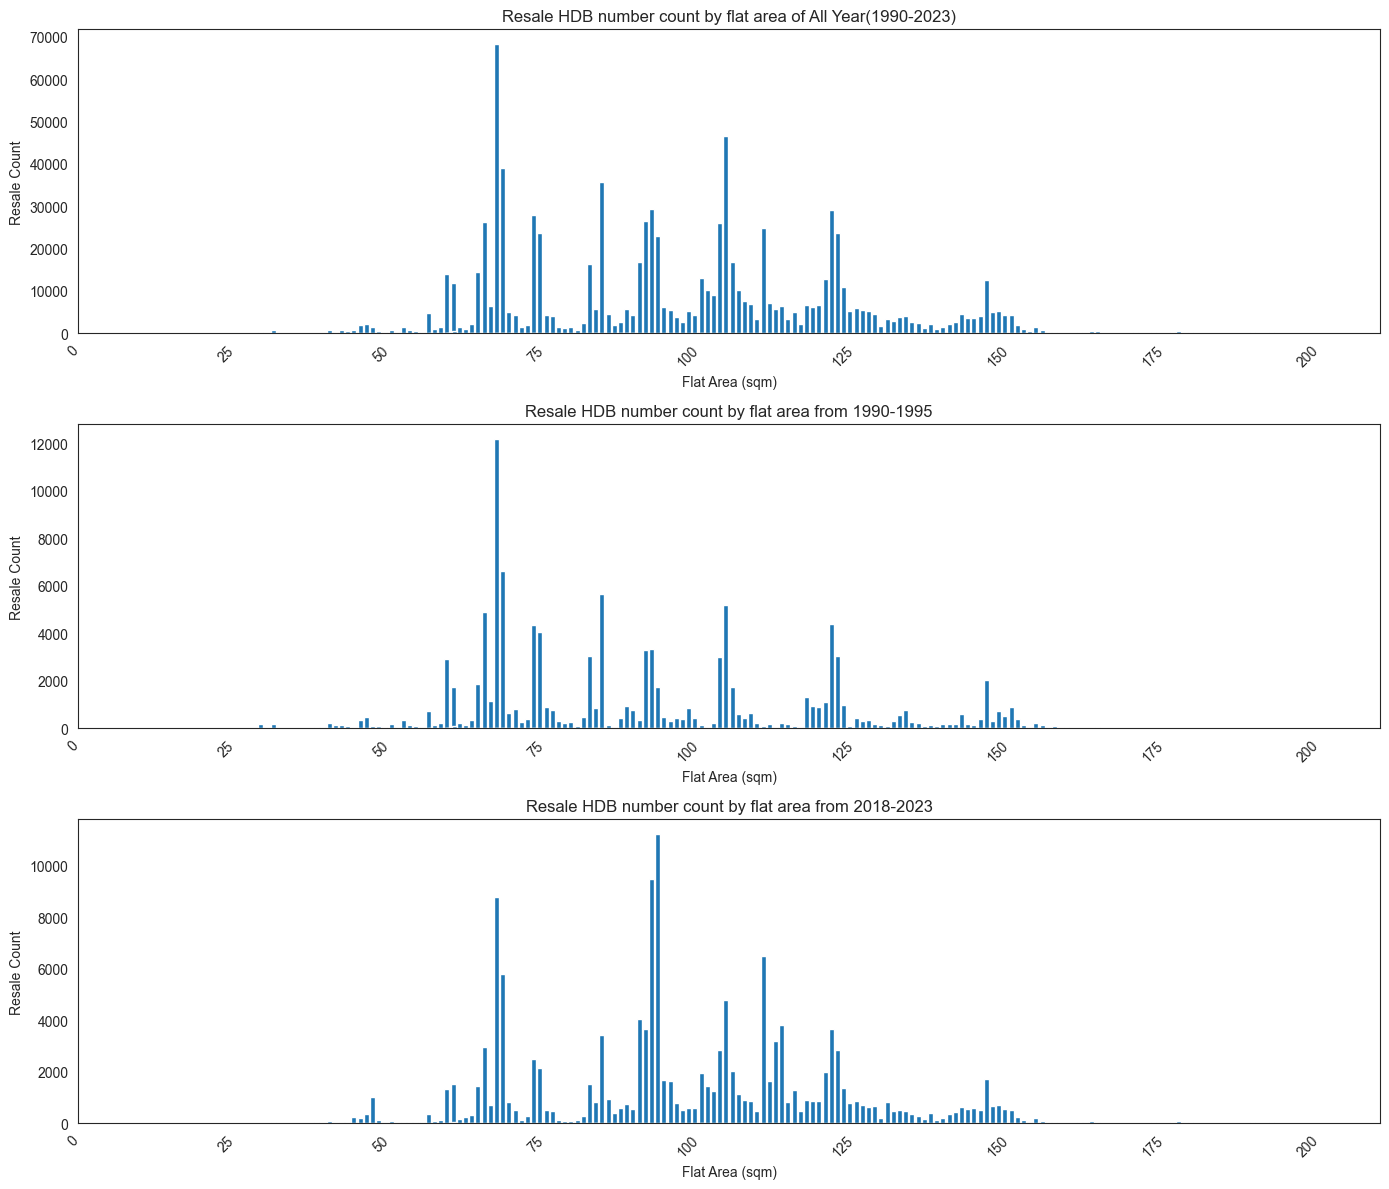

In [ ]:
# Check whether there is variation for HDB floor area of households.
df_area_18_23 = df_flat[(df_flat['year']>=2018)&(df_flat['year']<=2023)]
df_area_90_95 = df_flat[(df_flat['year']>=1990)&(df_flat['year']<=1995)]
flat_area_all_year = df_flat.groupby('floor_area_sqm').size().reset_index(name='count')
flat_area_18_23 = df_area_18_23.groupby('floor_area_sqm').size().reset_index(name='count')
flat_area_90_95 = df_area_90_95.groupby('floor_area_sqm').size().reset_index(name='count')

# plot the bar chart
plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
plt.xlim(-0.5, len(flat_area_all_year['floor_area_sqm'])-0.5)
plt.bar(flat_area_all_year['floor_area_sqm'],flat_area_all_year['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Flat Area (sqm)')
plt.ylabel('Resale Count')
plt.title('Resale HDB number count by flat area of All Year(1990-2023)')

plt.subplot(3, 1, 2)
plt.xlim(-0.5, len(flat_area_all_year['floor_area_sqm'])-0.5)
plt.bar(flat_area_90_95['floor_area_sqm'],flat_area_90_95['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Flat Area (sqm)')
plt.ylabel('Resale Count')
plt.title('Resale HDB number count by flat area from 1990-1995')

plt.subplot(3, 1, 3)
plt.xlim(-0.5, len(flat_area_all_year['floor_area_sqm'])-0.5)
plt.bar(flat_area_18_23['floor_area_sqm'],flat_area_18_23['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Flat Area (sqm)')
plt.ylabel('Resale Count')
plt.title('Resale HDB number count by flat area from 2018-2023')
plt.tight_layout()
plt.show()

In [ ]:
# calculate the mode/median/mean value of the area of resale HDB
stat_18_23 = [df_area_18_23['floor_area_sqm'].mode()[0],df_area_18_23['floor_area_sqm'].median(),df_area_18_23['floor_area_sqm'].mean()]
stat_90_95 = [df_area_90_95['floor_area_sqm'].mode()[0],df_area_90_95['floor_area_sqm'].median(),df_area_90_95['floor_area_sqm'].mean()]
m = [stat_90_95,stat_18_23]
matrix = pd.DataFrame(m)
matrix.columns = ['mode','median','mean']
matrix.index = ['stat of 90 to 95','stat of 18 to 23']
matrix

mode  median       mean
stat of 90 to 95  67.0    84.0  89.785029
stat of 18 to 23  93.0    93.0  97.317879

### Finding for Part 3:
These 3 graphs illustrate the changing distribution of the size of HDB in resale market from the 5-year-period since 1990 to 2023.   
Both from the charts and the statistical data,we can find out that the size of the house of Singaporean is becoming larger. This shift, to some extent also indicates the improvement of the living condition and the well-being of Singaporean citizens.


### Part 4 Spatial distribution of HDB at different resale prices
Note that part 4 requires installation of folium and openpyxl to see the geograph.  
<strong><span style='color: green'>If opened in jupyter notebook, make sure you trust the file (Upper-left corner: File > Trust)</span></strong>

In [ ]:
# 1990-1995
start_date = '1990-01-01'
end_date = '1995-12-31'

# first filter the resale transaction from 1990-1995
# then filter the lowest 25% transaction(measured by price per square meter)
subset_90_95 = data_df[(data_df['date'] >= start_date) & (data_df['date'] <= end_date)]
low_price_90_95 = subset_90_95[subset_90_95['price_per_sqm'] <= subset_90_95['price_per_sqm'].quantile(0.25)]
sub_90_95 = low_price_90_95.groupby("street_name")['price_per_sqm'].mean().round(2)

import folium
import openpyxl

locations = pd.read_excel('data/street_loc_new.xlsx')

missing_latitude = locations[locations['lat'].isna()]
missing_longitude = locations[locations['lon'].isna()]
missing_street_name = locations[locations['street'].isna()]
locations.dropna(subset=['lat', 'lon','street'], inplace=True)

locations = locations.rename(columns={'original_combine':'street_name'})
locations['street_name']=locations['street_name'].replace('Singapore ', '')#.str.upper()

locations_90_95 = pd.merge(sub_90_95, locations, on='street_name', how='inner')

# create a map center on Singapore
singapore_map = folium.Map(location=[1.3, 103.9], zoom_start=12)

# Iterate through each coordinate point in the dataset and add markers on the map.
for index, row in locations_90_95.iterrows():
    # Extract longitude and latitude information
    latitude = row['lat']
    longitude = row['lon']

    # extract other information
    name = row['street_name']
    address = row['formatted']

    # Create markers and add them to the map
    folium.Marker([latitude, longitude], tooltip=name, popup=address).add_to(singapore_map)

# show the map
singapore_map


A Snapshot for the above result:

![Alt text](map1.png)

In [ ]:
import folium
import openpyxl

# 2018-2023
start_date = '2018-01-01'
end_date = '2023-12-31'

subset_18_23 = data_df[(data_df['date'] >= start_date) & (data_df['date'] <= end_date)]
low_price_18_23 = subset_18_23[subset_18_23['price_per_sqm'] <= subset_18_23['price_per_sqm'].quantile(0.25)]
sub_18_23 = low_price_18_23.groupby("street_name")['price_per_sqm'].mean().round(2)

locations = pd.read_excel('data/street_loc_new.xlsx')

missing_latitude = locations[locations['lat'].isna()]
missing_longitude = locations[locations['lon'].isna()]
missing_street_name = locations[locations['street'].isna()]
locations.dropna(subset=['lat', 'lon','street'], inplace=True)

locations = locations.rename(columns={'original_combine':'street_name'})
locations['street_name']=locations['street_name'].replace('Singapore ', '')
#print(locations)

locations_18_23 = pd.merge(sub_18_23, locations, on='street_name', how='inner')
#print(locations_90_95)

# create a map center on Singapore
singapore_map = folium.Map(location=[1.3, 103.9], zoom_start=12)

# Iterate through each coordinate point in the dataset and add markers on the map.
for index, row in locations_18_23.iterrows():
    # Extract longitude and latitude information
    latitude = row['lat']
    longitude = row['lon']

    # extract other information
    name = row['street_name']
    address = row['formatted']

    # Create markers and add them to the map
    folium.Marker([latitude, longitude], tooltip=name, popup=address).add_to(singapore_map)

# show the map
singapore_map


A Snapshot for the above result:

![Alt text](map2.png)

### Finding for Part 4:   
We first filter the resale transactions from 1990-1995 and 2018-2023.Then we filter the lowest 25% transactions(measured by price per square meter) and plot them on map.  
We can find out that HDBs with the lowest 25% price per sqm spread evenly across the whole country and this trend is consistent all over these years.  
Such trend may signify that affordable housing is not limited to peripheral or underdeveloped areas, thus preventing certain areas characterized by poverty, which is beneficiary for building a harmonious and sustainably-developed society.        
From the map, we can also see that the green areas that stands for natural plants are well preserved all through these years, which represents environmental sustainability of housing sector.

### Part 5 Most popular attributes of HDB flat
In this part, we attempt to identify the most popular attributes of HDB flat to help the government better understand the needs of residents, therefore helping the government make more informed decisions that can satisfy the needs of public.       


#### 1. Rank categorical attributes of an resale HDB flat by numbers of resale records and find top 3 popular categorical attributes in history.
#### 1-1. Top 3 popular flat type among all HDB flat resales records:

In [ ]:
data_df_flat_cnt = data_df.value_counts('flat_type').head(3)
data_df_flat_cnt

flat_type
4 ROOM    344673
3 ROOM    291628
5 ROOM    191432
Name: count, dtype: int64

4 Room is the most popular flat type in history records.

#### 1-2. Top 3 popular storey range among all HDB flat resales records:

In [ ]:
data_df_storey_cnt = data_df.value_counts('storey_range').head(3)
data_df_storey_cnt

storey_range
04 TO 06    228556
07 TO 09    206396
01 TO 03    183294
Name: count, dtype: int64

Storey range from 4 to 6 is most popular in history records.

#### 1-3. Top 3 popular floor area (in sqm) among all HDB flat resales records:

In [ ]:
data_df_area_cnt = data_df.value_counts('floor_area_sqm').head(3)
data_df_area_cnt

floor_area_sqm
67.0     68296
104.0    46588
68.0     39032
Name: count, dtype: int64

Floor area 67 sqm is most popular in history records, followed by 104 sqm and 68 sqm, showing that there is a favor of small to medium floor area.

#### 1-4. Top 3 popular town locations among all HDB flat resales records:

In [ ]:
data_df_town_cnt = data_df.value_counts('town').head(3)
data_df_town_cnt

town
TAMPINES    78754
YISHUN      68872
BEDOK       65802
Name: count, dtype: int64

Top 3 popular town locations are Tampines, Yishun and Bedok.

#### 1-5. Top 3 popular street locations among all HDB flat resales records:

In [ ]:
data_df_street_cnt = data_df.value_counts('street_name').head(3)
data_df_street_cnt

street_name
YISHUN RING RD        17377
BEDOK RESERVOIR RD    14566
ANG MO KIO AVE 10     13644
Name: count, dtype: int64

Top 3 popular street locations are Yishun Ring Rd, Bedok Reservoir Rd and Ang Mo Kio Ave 10.

### Finding 1 for Part 5:
From the above information, we can see that the top popular HDB flat attributes are 3 to 5 Room type, 67-104 floor area sqm and 01 to 09 storey range, located in Tampines, Yishun and Bedok. Households generally prefer larger room type but smaller floor area, in lower storey range.  
Next step is to group categorical attributes by year in order to see whether the popular attributes change over time.

#### 2. Group by years to see popular trends over time for each categorical attributes of the resale HDB flats.

In [ ]:
data_df_flat = data_df.groupby('year')['flat_type'].value_counts()
data_df_flat

year  flat_type       
1990  3 ROOM              6992
      4 ROOM              3042
      5 ROOM              1636
      EXECUTIVE            433
      2 ROOM               328
                          ... 
2023  5 ROOM              4554
      EXECUTIVE           1147
      2 ROOM               516
      1 ROOM                 4
      MULTI GENERATION       2
Name: count, Length: 237, dtype: int64

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

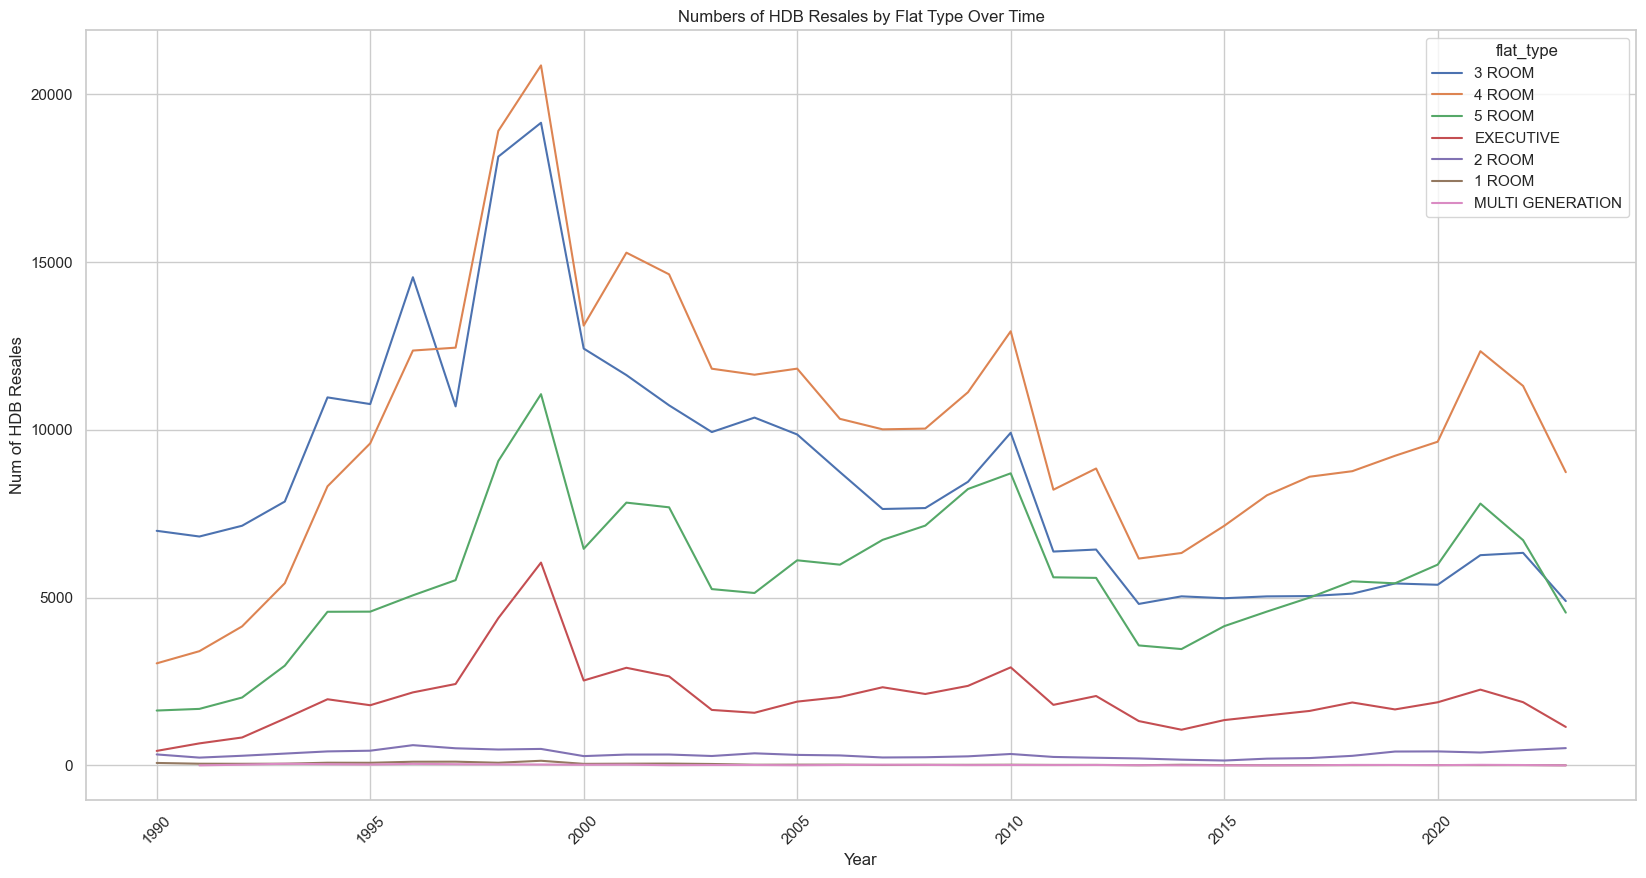

In [ ]:

plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
sns.lineplot(x='year', y=data_df_flat, hue='flat_type', data=data_df_flat)
plt.xlabel("Year")
plt.ylabel("Num of HDB Resales")
plt.title("Numbers of HDB Resales by Flat Type Over Time")
plt.xticks(rotation=45)
plt.show()

For popular flat type, it is indicated in the above graph that there is a shift for favor from 3 ROOM to 4 ROOM, and 5 ROOM is becoming increasingly popular than 3 ROOM.

In [ ]:
data_df_storey = data_df.groupby('year')['storey_range'].value_counts()
data_df_storey

year  storey_range
1990  04 TO 06        3131
      07 TO 09        2997
      10 TO 12        2570
      01 TO 03        2450
      13 TO 15         738
                      ... 
2023  37 TO 39          45
      40 TO 42          23
      43 TO 45           8
      46 TO 48           5
      49 TO 51           2
Name: count, Length: 427, dtype: int64

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

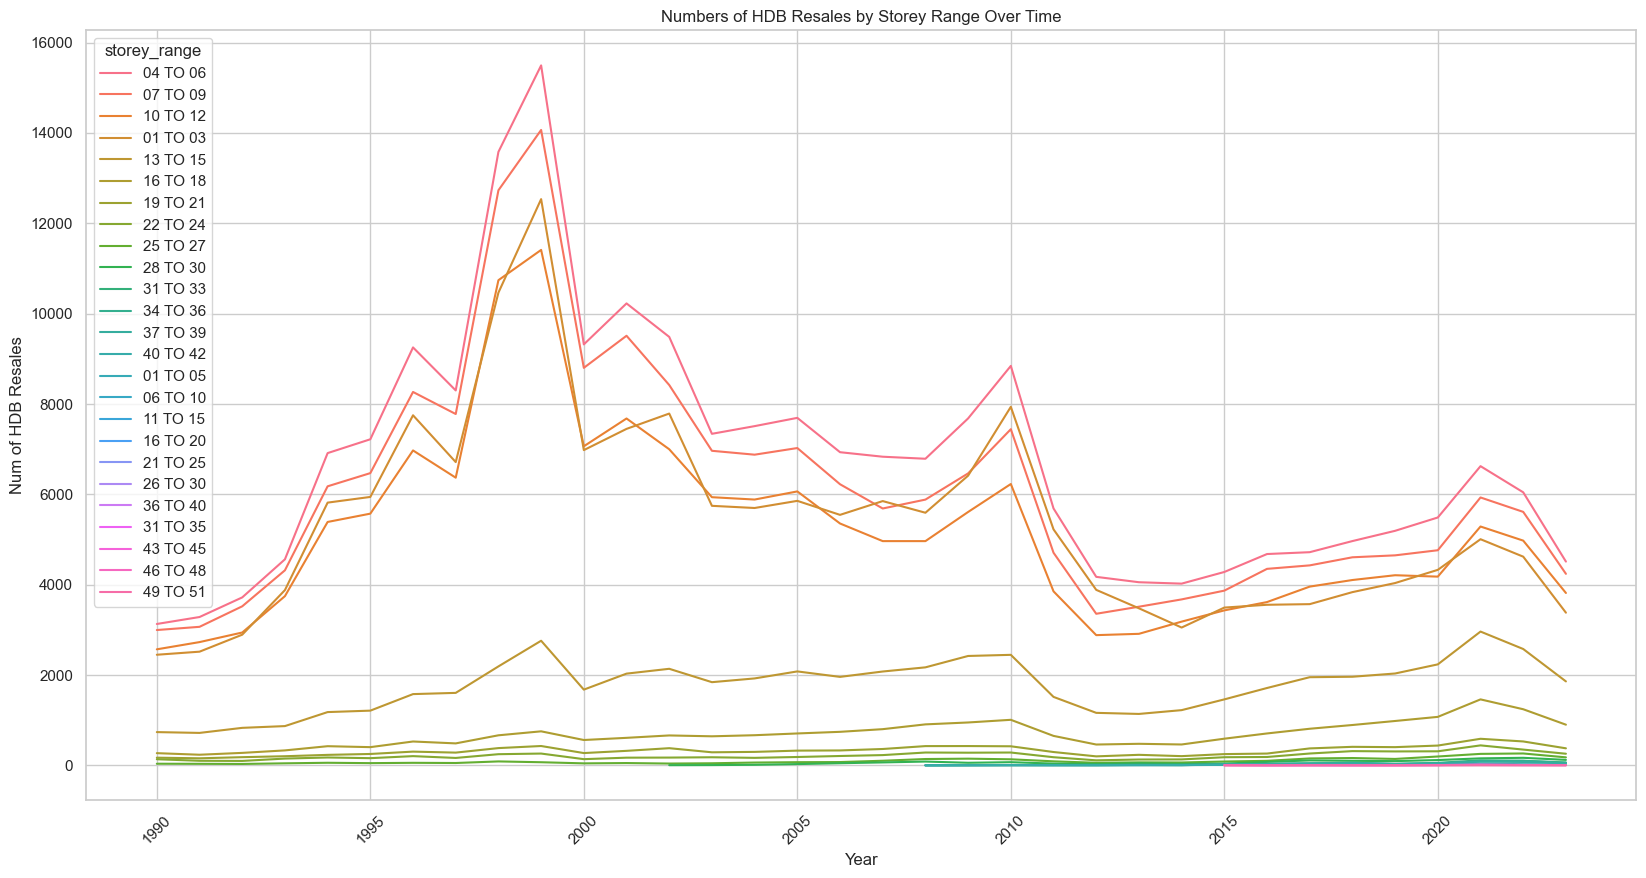

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y=data_df_storey, hue='storey_range', data=data_df_storey)
plt.xlabel("Year")
plt.ylabel("Num of HDB Resales")
plt.title("Numbers of HDB Resales by Storey Range Over Time")
plt.xticks(rotation=45)
plt.show()

For storey range, the graph shows that the top preference towards lower storey generally remain unchanged.   

In [ ]:
data_df_area = data_df.groupby('year')['floor_area_sqm'].value_counts()
data_df_area

year  floor_area_sqm
1990  67.0              1705
      68.0               902
      65.0               828
      73.0               475
      59.0               472
                        ... 
2023  160.0                1
      51.0                 1
      170.0                1
      100.2                1
      169.0                1
Name: count, Length: 5201, dtype: int64

In [ ]:
data_df_area = data_df.value_counts().groupby(['year']).sum()
data_df_area_50 = data_df.query("floor_area_sqm < 50").value_counts().groupby(['year']).sum()
data_df_area_50_100 = data_df.query("floor_area_sqm < 100 and floor_area_sqm >= 50").value_counts().groupby(['year']).sum()
data_df_area_100_150 = data_df.query("floor_area_sqm < 150 and floor_area_sqm >= 100").value_counts().groupby(['year']).sum()
data_df_area_150_200 = data_df.query("floor_area_sqm < 200 and floor_area_sqm >= 150").value_counts().groupby(['year']).sum()
data_df_area_200 = data_df.query("floor_area_sqm >= 200").value_counts().groupby(['year']).sum()

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

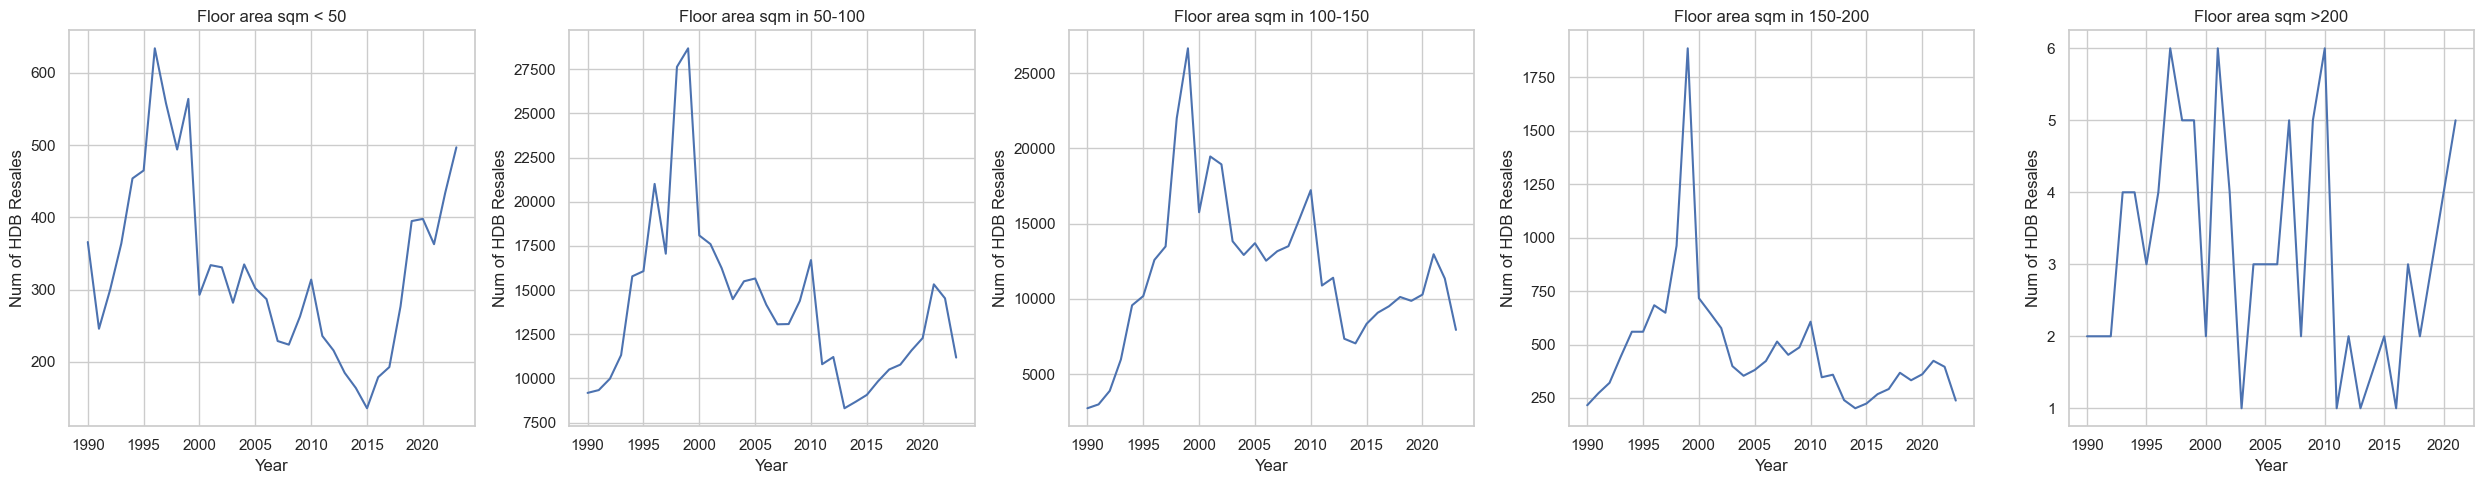

In [ ]:
y1 = data_df_area_50
y2 = data_df_area_50_100
y3 = data_df_area_100_150
y4 = data_df_area_150_200
y5 = data_df_area_200

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

sns.lineplot(data=data_df_area, x='year', y=y1, ax=axes[0])
axes[0].set_title('Floor area sqm < 50')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=data_df_area, x='year', y=y2, ax=axes[1])
axes[1].set_title('Floor area sqm in 50-100')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=data_df_area, x='year', y=y3, ax=axes[2])
axes[2].set_title('Floor area sqm in 100-150')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=data_df_area, x='year', y=y4, ax=axes[3])
axes[3].set_title('Floor area sqm in 150-200')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Num of HDB Resales')
sns.lineplot(data=data_df_area, x='year', y=y5, ax=axes[4])
axes[4].set_title('Floor area sqm >200')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Num of HDB Resales')

plt.tight_layout()
plt.show()


For floor area, it can be seen that the majority choice falls between 50-150 sqm.

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

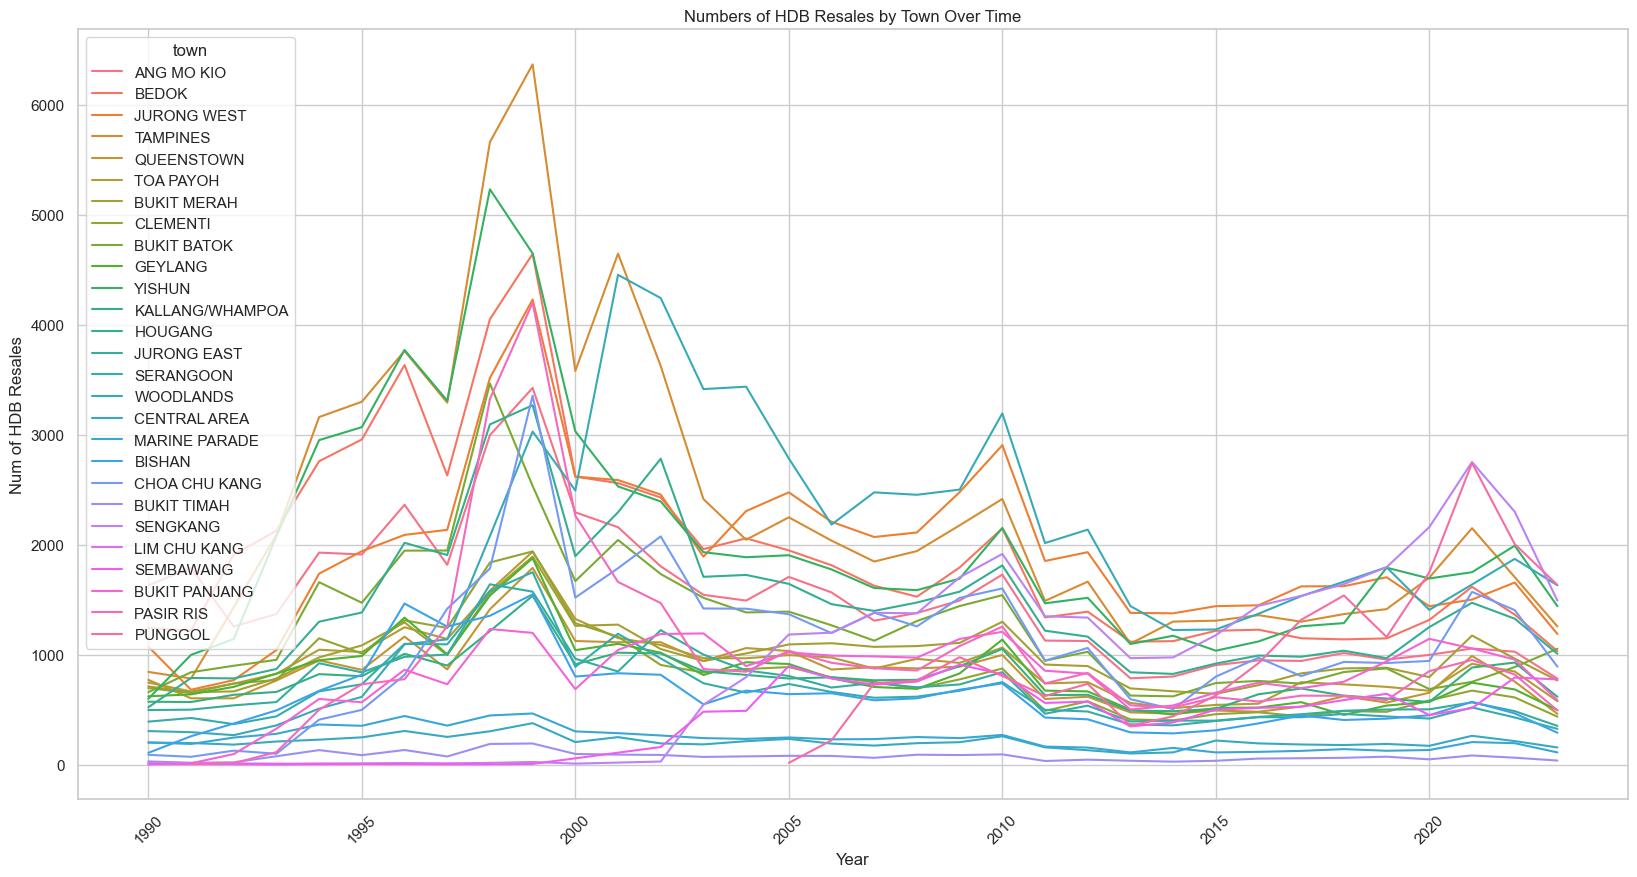

In [ ]:
data_df_town = data_df.groupby('year')['town'].value_counts()
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
sns.lineplot(x='year', y=data_df_town, hue='town', data=data_df_town)
plt.xlabel("Year")
plt.ylabel("Num of HDB Resales")
plt.title("Numbers of HDB Resales by Town Over Time")
plt.xticks(rotation=45)
plt.show()

c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TristanTong\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

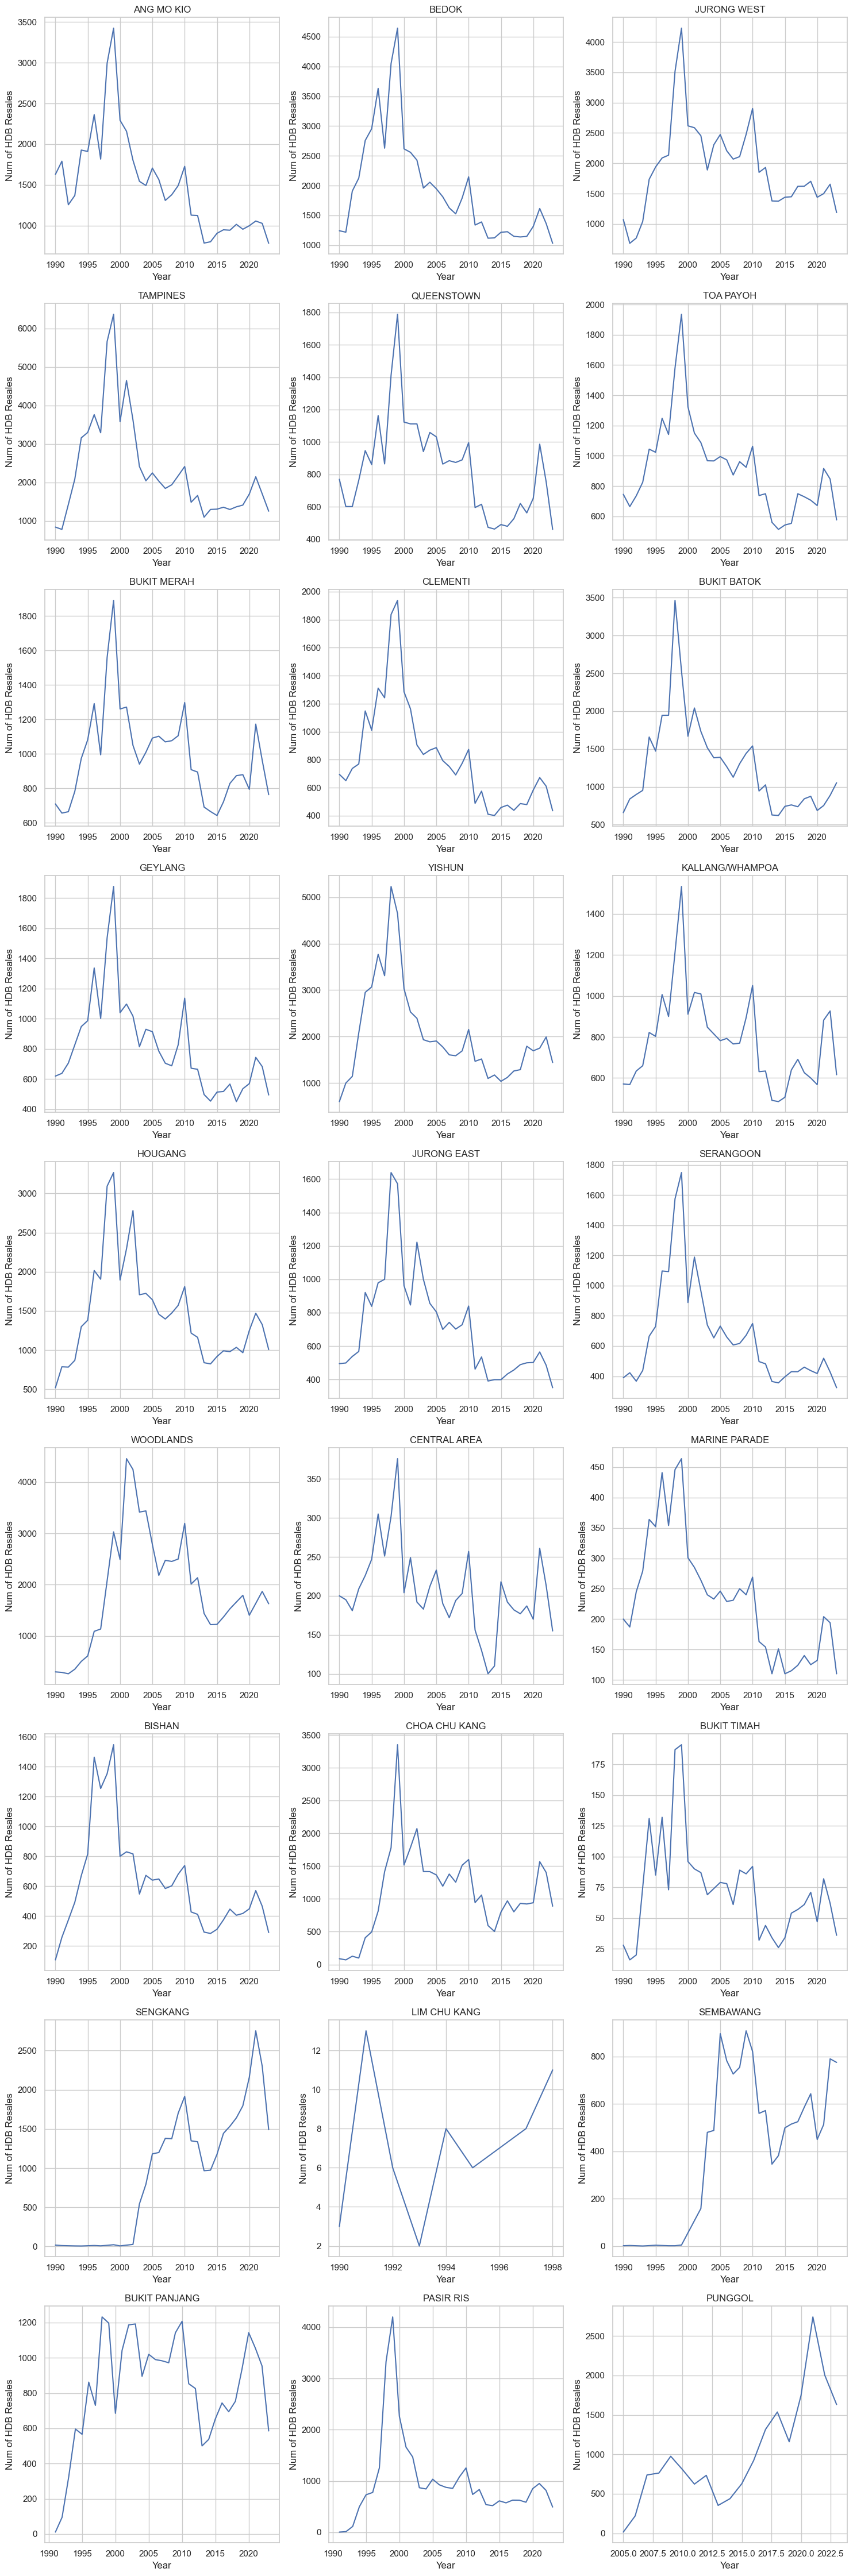

In [ ]:

y1 = data_df.query("town =='ANG MO KIO'").value_counts().groupby('year').sum()
y2 = data_df.query("town =='BEDOK'").value_counts().groupby('year').sum()
y3 = data_df.query("town =='JURONG WEST'").value_counts().groupby('year').sum()
y4 = data_df.query("town =='TAMPINES'").value_counts().groupby('year').sum()
y5 = data_df.query("town =='QUEENSTOWN'").value_counts().groupby('year').sum()
y6 = data_df.query("town =='TOA PAYOH'").value_counts().groupby('year').sum()
y7 = data_df.query("town =='BUKIT MERAH'").value_counts().groupby('year').sum()
y8 = data_df.query("town =='CLEMENTI'").value_counts().groupby('year').sum()
y9 = data_df.query("town =='BUKIT BATOK'").value_counts().groupby('year').sum()
y10 = data_df.query("town =='GEYLANG'").value_counts().groupby('year').sum()
y11 = data_df.query("town =='YISHUN'").value_counts().groupby('year').sum()
y12 = data_df.query("town =='KALLANG/WHAMPOA'").value_counts().groupby('year').sum()
y13 = data_df.query("town =='HOUGANG'").value_counts().groupby('year').sum()
y14 = data_df.query("town =='JURONG EAST'").value_counts().groupby('year').sum()
y15 = data_df.query("town =='SERANGOON'").value_counts().groupby('year').sum()
y16 = data_df.query("town =='WOODLANDS'").value_counts().groupby('year').sum()
y17 = data_df.query("town =='CENTRAL AREA'").value_counts().groupby('year').sum()
y18 = data_df.query("town =='MARINE PARADE'").value_counts().groupby('year').sum()
y19 = data_df.query("town =='BISHAN'").value_counts().groupby('year').sum()
y20 = data_df.query("town =='CHOA CHU KANG'").value_counts().groupby('year').sum()
y21 = data_df.query("town =='BUKIT TIMAH'").value_counts().groupby('year').sum()
y22 = data_df.query("town =='SENGKANG'").value_counts().groupby('year').sum()
y23 = data_df.query("town =='LIM CHU KANG'").value_counts().groupby('year').sum()
y24 = data_df.query("town =='SEMBAWANG'").value_counts().groupby('year').sum()
y25 = data_df.query("town =='BUKIT PANJANG'").value_counts().groupby('year').sum()
y26 = data_df.query("town =='PASIR RIS'").value_counts().groupby('year').sum()
y27 = data_df.query("town =='PUNGGOL'").value_counts().groupby('year').sum()


fig, axes = plt.subplots(9, 3, figsize=(15, 45))

sns.lineplot(data=y1, x='year', y=y1, ax=axes[0,0])
axes[0,0].set_title('ANG MO KIO')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y2, x='year', y=y2, ax=axes[0,1])
axes[0,1].set_title('BEDOK')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y3, x='year', y=y3, ax=axes[0,2])
axes[0,2].set_title('JURONG WEST')
axes[0,2].set_xlabel('Year')
axes[0,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y4, x='year', y=y4, ax=axes[1,0])
axes[1,0].set_title('TAMPINES')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y5, x='year', y=y5, ax=axes[1,1])
axes[1,1].set_title('QUEENSTOWN')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y6, x='year', y=y6, ax=axes[1,2])
axes[1,2].set_title('TOA PAYOH')
axes[1,2].set_xlabel('Year')
axes[1,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y7, x='year', y=y7, ax=axes[2,0])
axes[2,0].set_title('BUKIT MERAH')
axes[2,0].set_xlabel('Year')
axes[2,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y8, x='year', y=y8, ax=axes[2,1])
axes[2,1].set_title('CLEMENTI')
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y9, x='year', y=y9, ax=axes[2,2])
axes[2,2].set_title('BUKIT BATOK')
axes[2,2].set_xlabel('Year')
axes[2,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y10, x='year', y=y10, ax=axes[3,0])
axes[3,0].set_title('GEYLANG')
axes[3,0].set_xlabel('Year')
axes[3,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y11, x='year', y=y11, ax=axes[3,1])
axes[3,1].set_title('YISHUN')
axes[3,1].set_xlabel('Year')
axes[3,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y12, x='year', y=y12, ax=axes[3,2])
axes[3,2].set_title('KALLANG/WHAMPOA')
axes[3,2].set_xlabel('Year')
axes[3,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y13, x='year', y=y13, ax=axes[4,0])
axes[4,0].set_title('HOUGANG')
axes[4,0].set_xlabel('Year')
axes[4,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y14, x='year', y=y14, ax=axes[4,1])
axes[4,1].set_title('JURONG EAST')
axes[4,1].set_xlabel('Year')
axes[4,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y15, x='year', y=y15, ax=axes[4,2])
axes[4,2].set_title('SERANGOON')
axes[4,2].set_xlabel('Year')
axes[4,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y16, x='year', y=y16, ax=axes[5,0])
axes[5,0].set_title('WOODLANDS')
axes[5,0].set_xlabel('Year')
axes[5,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y17, x='year', y=y17, ax=axes[5,1])
axes[5,1].set_title('CENTRAL AREA')
axes[5,1].set_xlabel('Year')
axes[5,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y18, x='year', y=y18, ax=axes[5,2])
axes[5,2].set_title('MARINE PARADE')
axes[5,2].set_xlabel('Year')
axes[5,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y19, x='year', y=y19, ax=axes[6,0])
axes[6,0].set_title('BISHAN')
axes[6,0].set_xlabel('Year')
axes[6,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y20, x='year', y=y20, ax=axes[6,1])
axes[6,1].set_title('CHOA CHU KANG')
axes[6,1].set_xlabel('Year')
axes[6,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y21, x='year', y=y21, ax=axes[6,2])
axes[6,2].set_title('BUKIT TIMAH')
axes[6,2].set_xlabel('Year')
axes[6,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y22, x='year', y=y22, ax=axes[7,0])
axes[7,0].set_title('SENGKANG')
axes[7,0].set_xlabel('Year')
axes[7,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y23, x='year', y=y23, ax=axes[7,1])
axes[7,1].set_title('LIM CHU KANG')
axes[7,1].set_xlabel('Year')
axes[7,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y24, x='year', y=y24, ax=axes[7,2])
axes[7,2].set_title('SEMBAWANG')
axes[7,2].set_xlabel('Year')
axes[7,2].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y25, x='year', y=y25, ax=axes[8,0])
axes[8,0].set_title('BUKIT PANJANG')
axes[8,0].set_xlabel('Year')
axes[8,0].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y26, x='year', y=y26, ax=axes[8,1])
axes[8,1].set_title('PASIR RIS')
axes[8,1].set_xlabel('Year')
axes[8,1].set_ylabel('Num of HDB Resales')
sns.lineplot(data=y27, x='year', y=y27, ax=axes[8,2])
axes[8,2].set_title('PUNGGOL')
axes[8,2].set_xlabel('Year')
axes[8,2].set_ylabel('Num of HDB Resales')




plt.tight_layout()
plt.show()



### Finding 2 for Part 5:
The above analysis shows that among all categorical attributes the preference for a lower storey is unchanged, while there is a shift towards more rooms for flat type.  
To satisfy the preference for lower storey, the recommendations might be building more HDB flats with storey no more than 12, or providing elevators as infrastructure.  
To satisfy the preference for more rooms in flat type, the recommendations might be applying designs of flat type to fully utilize the inner space.  

## Section 5. Predictive analysis
**The complete code for this part can be found in the ‘/Prediction Model’ folder and only selected important code excerpts included in the notebook.**

## Part 1. Predictive Analysis Approach

The price prediction process consists of three main steps: data preprocessing with feature engineering, regression model building and training, selection of the optimal regression model.

#### Step 1. Data Preprocessing and Feature Engineering


The first step is data preprocessing. Town, flat type, remaining lease, year, and floor area sqm are important factors influencing HDB prices. Thus the price prediction model will contain these features. In addition, , we will add two new attributes to the dataset: the nearest MRT station to each HDB and its distance to enhance the accuracy of model predictions This will involve iterating through the HDB dataset and the MRT location dataset, calculating the surface distance based on their latitude and longitude coordinates, and then identifying the nearest MRT station. We take into account the commencement dates of the MRT stations in our calculations.

In [ ]:
def earth_distance(x, y):

  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def add_distance(df):
    mrt_locations = pd.read_csv("mrt_data.csv")
    df['nearest_mrt'] = ""
    df['mrt_dist'] = float('inf')
    for idx, row in df.iterrows():
        min_dist = float('inf')
        nearest_mrt = None
        if not row['lat']:
            hdb_location = (row['lat'],row['lng'])
            for mrt_idx, mrt_row in mrt_locations.iterrows():
                mrt_location = (mrt_row['lat'],mrt_row['lng'])
                mrt_commencement_date = mrt_row['commencement_date']
                dist=earth_distance(hdb_location,mrt_location)
                if dist<min_dist and mrt_commencement_date > row['year']:
                    min_dist = dist
                    nearest_mrt = mrt_row['station_name']
            df.at[idx,'nearest_mrt'] = nearest_mrt
            df.at[idx,'mrt_dist'] = min_dist
    return df



 Categorical features such as Town, Flat type, and Nearest MRT were ordinal encoded. Feature scaling was performed on continuous features such as Floor Area Sqm and MRT Distance. Discrete features such as remaining lease and year were converted to integer form.   

In [ ]:
# Model Creation

numerical_feats = list(df.dtypes[df.dtypes == "float"].index)
print("Number of Numerical features: ", len(numerical_feats))

discrete_feats = list(df.dtypes[df.dtypes == "int64"].index)
print("Number of discrete features: ", len(discrete_feats))

categorical_feats = list(df.dtypes[df.dtypes == "object"].index)
print("Number of Categorical features: ", len(categorical_feats))


ct = ColumnTransformer(
    transformers=[

        ('cat', OrdinalEncoder(), categorical_feats),
        ('selector', 'passthrough', discrete_feats),
        ('num', StandardScaler(), numerical_feats)
    ],
    remainder='passthrough'
)

preprocess= Pipeline(steps=[('preprocessor', ct)])

transformed = preprocess.fit_transform(df)

columns=[]
columns.extend(categorical_feats)
columns.extend(discrete_feats)
columns.extend(numerical_feats)
X = pd.DataFrame(transformed, columns=columns)

#### Step 2. Regression model building and training

Several regression models were constructed and trained with the dataset, incorporating hyperparameter tuning, GridSearchCV, to improve the model performance. The trained models were evaluated with a separate testing set.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##################### Linear Regression ##################################
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)
joblib.dump(LR, 'model/resalemodelLR.pkl')

# Making predictions
y_pred = LR.predict(X_test)

# Evaluating the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)
lr_intercept = LR.intercept_
lr_coef = LR.coef_
print("LR Mean Absolute Error (MAE):", lr_mae)
print("LR Root Mean Squared Error (RMSE):", lr_rmse)
print("LR R^2 Score:", lr_r2)
print("LR Intercept:", lr_intercept)
print("LR Coefficients:", lr_coef)





############################ XGBOOST ###################################

import xgboost
from sklearn.model_selection import GridSearchCV

regressor=xgboost.XGBRegressor()
param_grid = {
    'learning_rate': [0.01,0.05, 0.1, 0.2,0.3],          # Learning rate
    'max_depth': [3, 4, 5],                      # Maximum depth of the trees
    'n_estimators': [100, 200, 300,400,500]             # Number of boosting rounds
}

Best_xgbr = GridSearchCV(regressor,param_grid=param_grid,cv=5)
Best_xgbr.fit(X_train,y_train)

joblib.dump(Best_xgbr, 'model/resalemodelXGBOOST.pkl')

y_pred = Best_xgbr.predict( X_test )

xgboost_mae = mean_absolute_error(y_test, y_pred)
xgboost_mse = mean_squared_error(y_test, y_pred)
xgboost_rmse = np.sqrt(xgboost_mse)
xgboost_r2 = r2_score(y_test, y_pred)

# Print the metrics
print("XGBOOST Mean Absolute Error (MAE):", xgboost_mae)
print("XGBOOST Mean Squared Error (MSE):", xgboost_mse)
print("XGBOOST Root Mean Squared Error (RMSE):", xgboost_rmse)
print("XGBOOST R-squared (R2):", xgboost_r2)


# Number of observations and predictors
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate Adjusted R-squared
xgboost_adjusted_r2 = 1 - (1-xgboost_r2)*(n-1)/(n-p-1)

print("XGBOOST Adjusted R-squared:", xgboost_adjusted_r2)





############################## Ridge ####################################3
from sklearn.linear_model import Ridge

LRidge = Ridge()

LRidge.fit(X_train, y_train)
ridge_pred = LRidge.predict(X_test)
joblib.dump(LRidge, 'model/resalemodelRidge.pkl')

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Mean Absolute Error (MAE):", ridge_mae)
print("Ridge Mean Squared Error (MSE):", ridge_mse)
print("Ridge Root Mean Squared Error (RMSE):", ridge_rmse)
print("Ridge R-squared (R2):", ridge_r2)




############################# Decision Tree #############################
from sklearn.tree import DecisionTreeRegressor

dtr= DecisionTreeRegressor()
dtr.fit(X_train, y_train)

joblib.dump(dtr, 'model/resalemodelDTR.pkl')

dtr_pred = dtr.predict(X_test)

dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)
dtr_r2 = r2_score(y_test, dtr_pred)

print("DTR Mean Absolute Error (MAE):", dtr_mae)
print("DTR Mean Squared Error (MSE):", dtr_mse)
print("DTR Root Mean Squared Error (RMSE):", dtr_rmse)
print("DTR R-squared (R2):", dtr_r2)


############################## Random forest ####################################
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200,300],  # Number of trees in the forest
    'max_depth': [10, 20],   # Maximum depth of the trees
}
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, verbose=2)
rf_grid_search.fit(X_train, y_train)

joblib.dump(rf_grid_search, 'model/reasalemodelRandomForest.pkl')

print(rf_grid_search.best_params_)
rf_pred = rf_grid_search.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("RF Mean Absolute Error (MAE):", rf_mae)
print("RF Mean Squared Error (MSE):", rf_mse)
print("RF Root Mean Squared Error (RMSE):", rf_rmse)
print("RF R-squared (R2):", rf_r2)


#### Step 3. Selection of the optimal regression model

The performance of each model is evaluated with the Mean Absolute Error (MAE) and Root Mean Square Error (RMSE):

LR Mean Absolute Error (MAE): 78345.28431161784

LR Root Mean Squared Error (RMSE): 106942.9820860062

LR R^2 Score: 0.607998679686349

LR Intercept: -55733244.6843104

LR Coefficients: [ -2535.24419639  43731.95790972   -227.59832649   4031.5638824
  27658.87099268 -39569.97300064  62916.76899956]


**XGBOOST Mean Absolute Error (MAE): 26000.8879628944**

XGBOOST Mean Squared Error (MSE): 1267526808.8716314

XGBOOST Root Mean Squared Error (RMSE): 35602.342744145804

XGBOOST R-squared (R2): 0.9565549698316343

**XGBOOST Adjusted R-squared: 0.9565457765060243**


Ridge Mean Absolute Error (MAE): 78345.25699891914

Ridge Mean Squared Error (MSE): 11436802042.256233

Ridge Root Mean Squared Error (RMSE): 106942.98500722818

Ridge R-squared (R2): 0.6079986582707709


DTR Mean Absolute Error (MAE): 30686.147237029098

DTR Mean Squared Error (MSE): 1965266607.1947799

DTR Root Mean Squared Error (RMSE): 44331.32760469485

DTR R-squared (R2): 0.9326396361474468


RF Mean Absolute Error (MAE): 26301.299154793833

RF Mean Squared Error (MSE): 1377068035.1248705

RF Root Mean Squared Error (RMSE): 37108.867338210024

RF R-squared (R2): 0.9528003968743268


The Ridge, Decision Tree, Random Forest, and XGBoost regressors were constructed to predict HDB flat resale prices. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) for each model. Among these regressors, the XGBoost regressor emerges as the most effective predictor with the lowest MAE and RMSE. Conversely, the Ridge regressor performs the poorest among the models.

Specifically, the XGBoost regressor achieves an MAE of 26,000 SGD, an amount that we deem relatively low compared to the median sale price of 300,000 SGD. This error margin is acceptable since it is a small fraction of the typical sale price.


## Part 2. HDB Resale Price Prediction App

At last, we build a simple GUI application to predict the resale prices of HDB in Singapore. This application utilizes XGBoost model for price prediction. Users can input various attributes of the apartment, such as town, flat type, floor area, remaining lease duration, year of prediction, and postal code. Then click a button to initiate the prediction process.

In [ ]:
#HDB Resale Price App
#Runing by -python predectionApp.py in terminal or Run directly in the IDE

import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pickle
import pandas as pd
import seaborn as sns
import joblib
from sklearn import pipeline
from sklearn import compose
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

sample_data = [{
    'town': "ANG MO KIO",
    'flat_type': "3 ROOM",
    'floor_area_sqm': 100.0,
    'remaining_lease':90,
    'year':2029,
    'nearest_mrt':"Ang Mo Kio",
    'mrt_dist': 0.966743,
    }]


def predict_price():
    full_info_df = pd.read_csv("data/hdb_data_with_mrt_info.csv")
    town = town_combobox.get()
    flat_type = flat_type_combobox.get()
    floor_area = floor_area_entry.get()
    remaining_lease = remaining_lease_entry.get()
    year = year_entry.get()
    postal_code = int(postal_code_entry.get())
    nearest_mrt = None
    mrt_dist = None
    if postal_code in full_info_df['postal'].values:
        selected_data = full_info_df[full_info_df['postal'] == postal_code]
        if selected_data['town'].iloc[0] == town:
            nearest_mrt = selected_data['nearest_mrt'].iloc[0]
            mrt_dist = selected_data['mrt_dist'].iloc[0]
        else:
            #messagebox.showinfo("Error", "The provided postcode does not correspond to the selected town. Please enter a valid postcode.")
            display_text.config(state=tk.NORMAL)
            display_text.delete(1.0, tk.END)
            display_text.insert(tk.END, "The provided postcode does not correspond to the selected town. Please enter a valid postcode.")
    else:
        #messagebox.showinfo("Error", "Postal code not found. Please enter a valid postcode.")
        display_text.config(state=tk.NORMAL)
        display_text.delete(1.0, tk.END)
        display_text.insert(tk.END, "Postal code not found. Please enter a valid postcode.")



    df = pd.read_csv("data/hdb_data_for_prediction.csv")
    y=df['resale_price']
    df=df.drop("resale_price", axis=1)

    numerical_feats = list(df.dtypes[df.dtypes == "float"].index)
    discrete_feats = list(df.dtypes[df.dtypes == "int64"].index)
    categorical_feats = list(df.dtypes[df.dtypes == "object"].index)
    ct = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), categorical_feats),
            ('selector', 'passthrough', discrete_feats),
            ('num', StandardScaler(), numerical_feats)
        ],
        remainder='passthrough'
    )
    preprocess= Pipeline(steps=[('preprocessor', ct)])
    transformed = preprocess.fit_transform(df)
    columns=[]
    columns.extend(categorical_feats)
    columns.extend(discrete_feats)
    columns.extend(numerical_feats)

    data = [{
        'town': town,
        'flat_type': flat_type,
        'floor_area_sqm': float(floor_area),
        'remaining_lease': int(remaining_lease),
        'year': int(year),
        'nearest_mrt': nearest_mrt,
        'mrt_dist': float(mrt_dist),
        }]

    pred_df= pd.DataFrame(data)
    transformed_new_data = preprocess.transform(pred_df)
    test = pd.DataFrame(transformed_new_data, columns=columns)


    model_xgboost = joblib.load('model/resalemodelXGBOOST.pkl')
    try:
        prediction = model_xgboost.predict(test)[0]
        prediction = int(prediction)
        prediction = (prediction // 100) * 100
        #messagebox.showinfo("Prediction", f"Predicted price: {prediction} SGD")
        display_text.config(state=tk.NORMAL)
        display_text.delete(1.0, tk.END)
        formatted_price = "{:,}".format(prediction)
        display_text.insert(tk.END, "Prediction: " + f"Predicted price: {formatted_price} SGD")
    except Exception as e:
        #messagebox.showerror("Error", f"An error occurred: {str(e)}")
        display_text.config(state=tk.NORMAL)
        display_text.delete(1.0, tk.END)
        display_text.insert(tk.END, f"An error occurred: {str(e)}")



# Main Interface
root = tk.Tk()
root.title("Input the HDB info to Get Prediction Price")

tk.Label(root, text="Town:").grid(row=0, column=0, padx=5, pady=5)
town_options = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL',"CENTRAL AREA"]
town_combobox = ttk.Combobox(root, values=town_options)
town_combobox.grid(row=0, column=1, padx=5, pady=5)
town_combobox.set(sample_data[0]['town'])

tk.Label(root, text="Flat Type:").grid(row=1, column=0, padx=5, pady=5)
flat_type_options = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE','MULTI-GENERATION']
flat_type_combobox = ttk.Combobox(root, values=flat_type_options)
flat_type_combobox.grid(row=1, column=1, padx=5, pady=5)
flat_type_combobox.set(sample_data[0]['flat_type'])

tk.Label(root, text="Floor Area (sqm):").grid(row=2, column=0, padx=5, pady=5)
floor_area_entry = tk.Entry(root)
floor_area_entry.grid(row=2, column=1, padx=5, pady=5)
floor_area_entry.insert(0, str(sample_data[0]['floor_area_sqm']))

tk.Label(root, text="Remaining Lease:").grid(row=3, column=0, padx=5, pady=5)
remaining_lease_entry = tk.Entry(root)
remaining_lease_entry.grid(row=3, column=1, padx=5, pady=5)
remaining_lease_entry.insert(0, str(sample_data[0]['remaining_lease']))

tk.Label(root, text="Year:").grid(row=4, column=0, padx=5, pady=5)
year_entry = tk.Entry(root)
year_entry.grid(row=4, column=1, padx=5, pady=5)
year_entry.insert(0, str(sample_data[0]['year']))

tk.Label(root, text="Postal code:").grid(row=5, column=0, padx=5, pady=5)
postal_code_entry = tk.Entry(root)
postal_code_entry.grid(row=5, column=1, padx=5, pady=5)
postal_code_entry.insert(0, 560406)

submit_button = tk.Button(root, text="Press to Predict", command=predict_price)
submit_button.grid(row=6, columnspan=2, padx=5, pady=10)

display_text = tk.Text(root, height=10, width=50)
display_text.grid(row=7, columnspan=2, padx=5, pady=5)
display_text.config(state=tk.DISABLED)

root.mainloop()

The following are screenshots of the GUI app during execution. If the postal code entered by the user does not match the selected town or if no relevant information is found in the dataset, the user will be prompted to re-enter the information. Otherwise, the predicted price will be displayed.

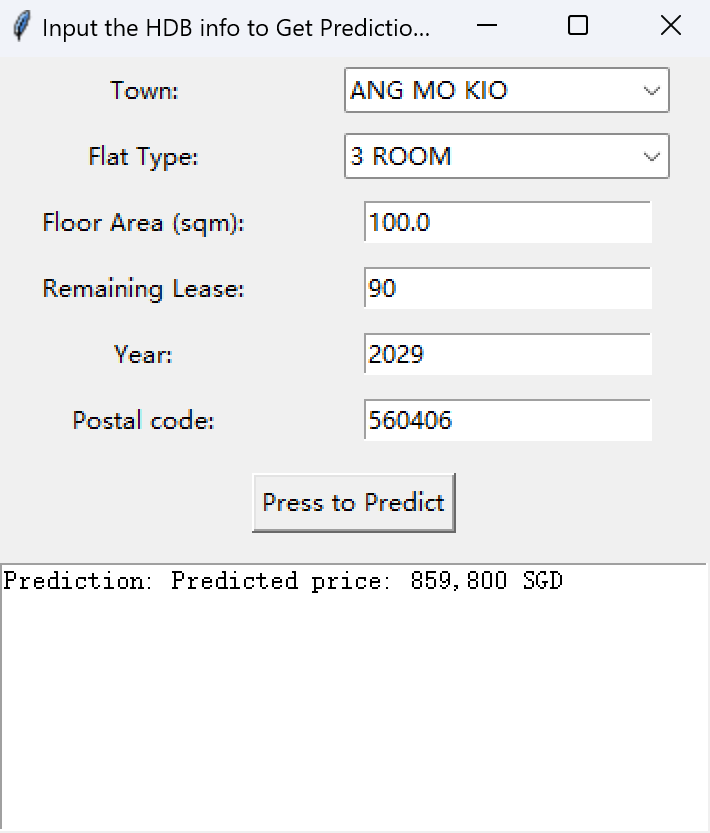
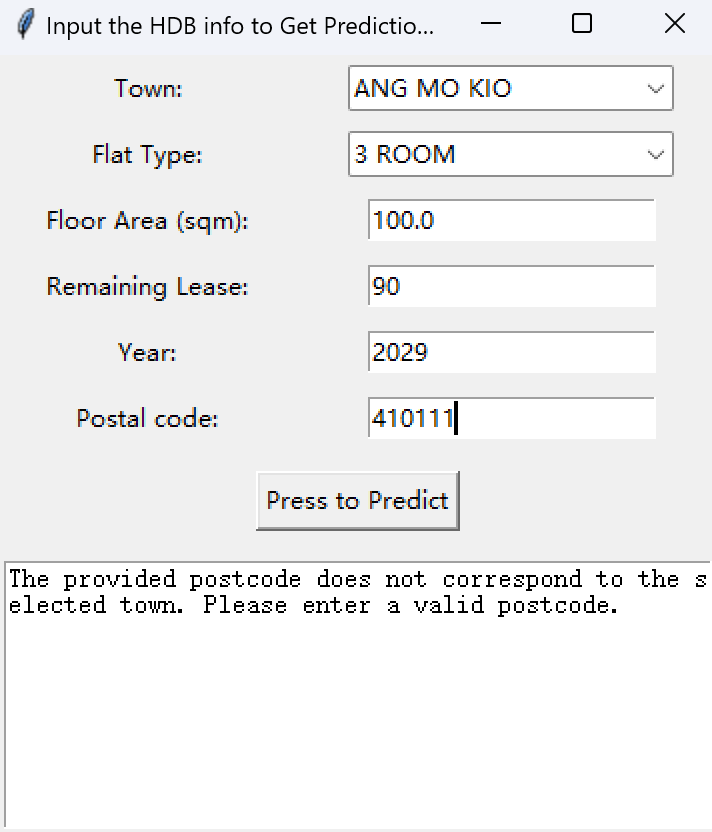
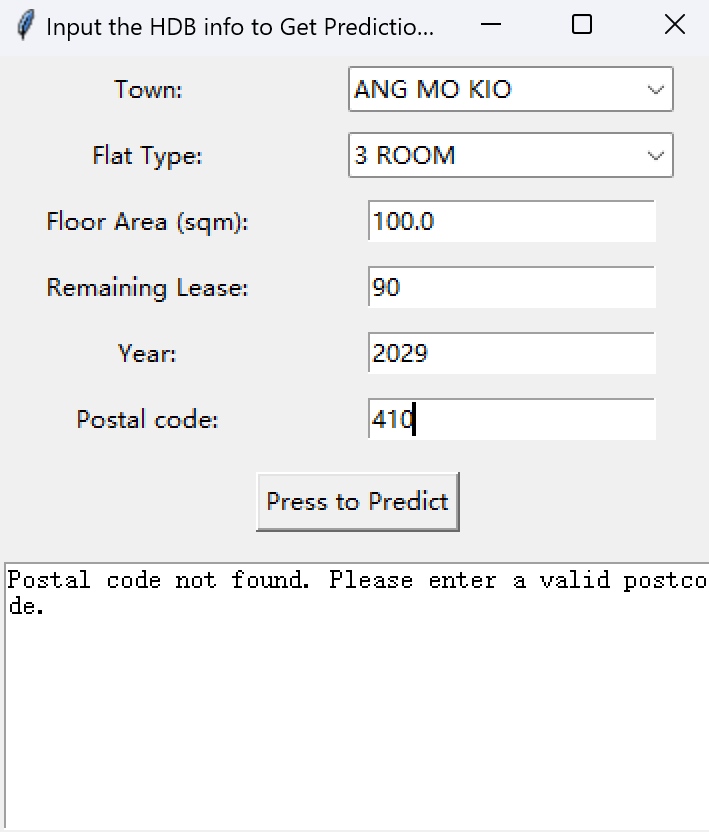

## Part 3. Trend of Future Price

Forecasts for the future ten years of housing price trends in Singapore will be made based on the price prediction model. Two typical samples will be selected as high-priced and low-priced HDBs.

For the high-priced sample, the main attributes are:

**Town:** BUKIT MERAH;

**Flat type:** 5 ROOM;

**Remaining lease:** 77

**Nearest MRT:** Redhill;

**Distance:** 0.3 km.

Its attributes meet the characteristics of high-priced HDBs obtained from EDA, including being located in the city center, close to the subway station, and having more rooms.

For the low-priced sample, the main attributes are:

**Town:** JURONG EAST;

**Flat type:** 3 ROOM;

**Remaining lease:** 53

**Nearest MRT:** Jurong East;

**Distance:** 1.48 km.

Its attributes meet the characteristics of low-priced HDBs obtained from EDA, including being far from the city center, far from the subway station, and having fewer rooms.

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import joblib
from sklearn import pipeline
from sklearn import compose
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt


predicted_prices_1 = []
predicted_prices_2 = []

sample_data_1 = [{
    'town': "BUKIT MERAH",
    'flat_type': "5 ROOM",
    'floor_area_sqm': 115.0,
    'remaining_lease':77,
    'year':2029,
    'nearest_mrt':"Redhill",
    'mrt_dist': 0.29912,
    }]

sample_data_2 = [{
    'town': "JURONG EAST",
    'flat_type': "3 ROOM",
    'floor_area_sqm': 77.0,
    'remaining_lease':53,
    'year':2029,
    'nearest_mrt':"Jurong East",
    'mrt_dist': 1.483680,
}]

df = pd.read_csv("data/hdb_data_for_prediction.csv")
y=df['resale_price']
df=df.drop("resale_price", axis=1)

numerical_feats = list(df.dtypes[df.dtypes == "float"].index)
discrete_feats = list(df.dtypes[df.dtypes == "int64"].index)
categorical_feats = list(df.dtypes[df.dtypes == "object"].index)
ct = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_feats),
        ('selector', 'passthrough', discrete_feats),
        ('num', StandardScaler(), numerical_feats)
    ],
    remainder='passthrough'
)
preprocess= Pipeline(steps=[('preprocessor', ct)])
transformed = preprocess.fit_transform(df)
columns=[]
columns.extend(categorical_feats)
columns.extend(discrete_feats)
columns.extend(numerical_feats)

for year in range(2025,2035):
    sample_data_1[0]['year'] = year
    sample_data_2[0]['year'] = year
    pred_df_1= pd.DataFrame(sample_data_1)
    transformed_new_data_1 = preprocess.transform(pred_df_1)
    test_1 = pd.DataFrame(transformed_new_data_1, columns=columns)
    pred_df_2= pd.DataFrame(sample_data_2)
    transformed_new_data_2 = preprocess.transform(pred_df_2)
    test_2 = pd.DataFrame(transformed_new_data_2, columns=columns)

    model = joblib.load('model/resalemodelRidge.pkl')
    predicted_price_1 = model.predict(test_1)
    predicted_price_2 = model.predict(test_2)


    predicted_prices_1.append(predicted_price_1[0])
    predicted_prices_2.append(predicted_price_2[0])


years = list(range(2025, 2035))


plt.figure(figsize=(10, 6))
plt.plot(years, predicted_prices_1, label='High-priced HDB (BUKIT MERAH)', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Predicted Price SGD')
plt.title('Predicted Price Trends of High-priced HDB (BUKIT MERAH) (2025-2034)')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Plot the price trend for the low-priced HDB sample (JURONG EAST)
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_prices_2, label='Low-priced HDB (JURONG EAST)', marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Predicted Price SGD')
plt.title('Predicted Price Trends of Low-priced HDB (JURONG EAST) (2025-2034)')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The results are shown below.
The price of high-priced HDBs rose from 779,971 SGD to 992,616 SGD, with an annual growth rate of 2.7%, while the price of low-priced HDBs rose from 380,062 SGD to 592,707 SGD, with a growth rate of 5.6%, which is lower than Singapore's recent CPI level. This indicates that the increase in housing prices has been kept within a reasonable range.


The trend of high-priced HDB is:

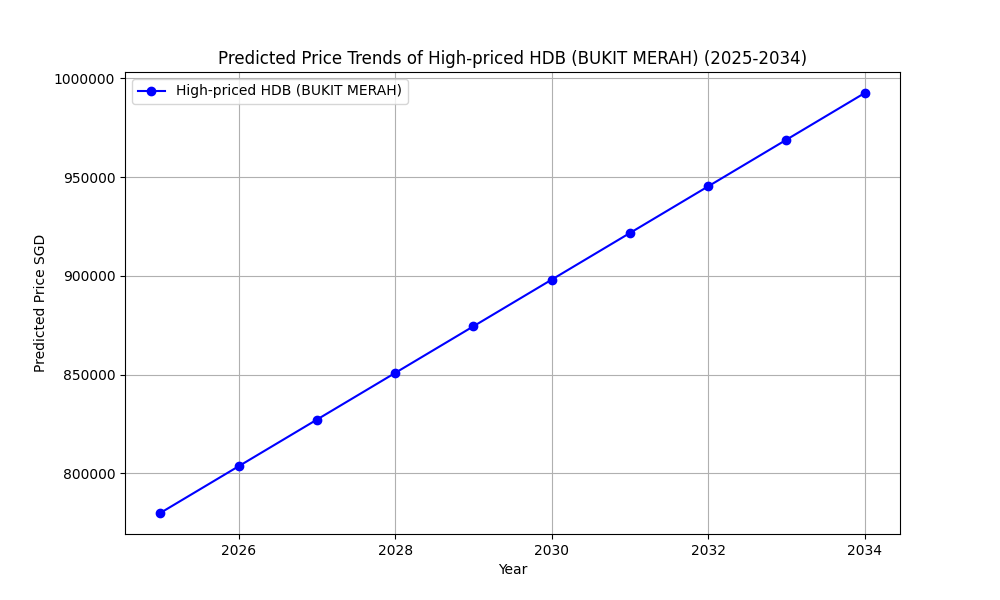


The trend of low-priced HDB is:

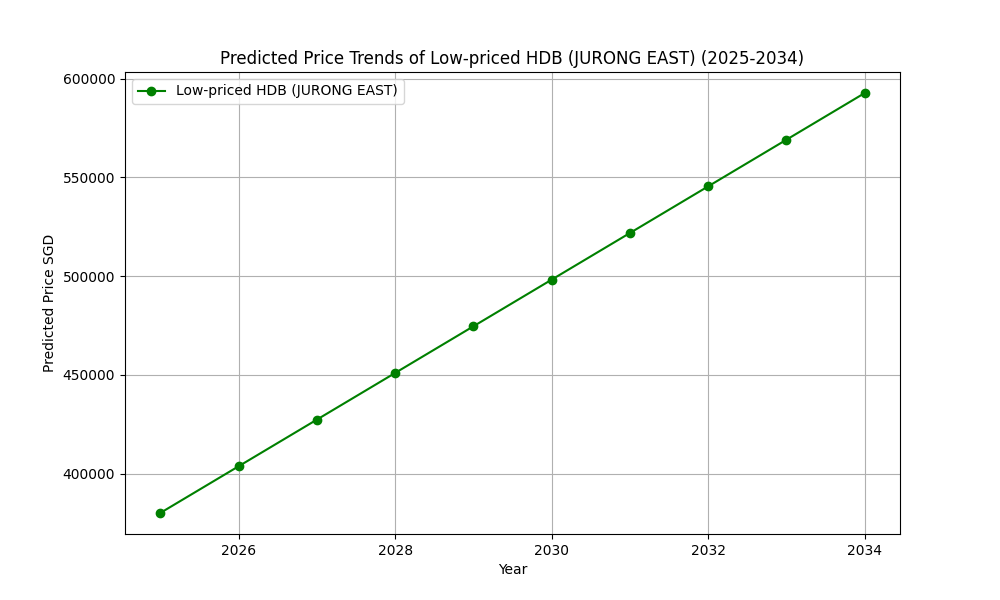


## Section 6. Conclusion

Towards a close investigation to HDB resale data and additional datasets and through the discussion from macro to micro, it can be concluded that Singapore government made efforts on keeping the housing sector development in a sustainable trend, by controlling the price of HDB resale in an affordable manner and continually encouraging a diverse distribution of HDB, for the good of economic growth in long run.


## References



Shama, Z. S. & Motlak, J. B.(2019) Indicators for Sustainable Housing. (IOP Conf. Ser.: Mater. Sci.Eng. 518 022009). Retrieved from https://iopscience.iop.org/article/10.1088/1757-899X/518/2/022009/pdf   
CHONG, S.L.(2013, Jun 6) Backdating the Date of Option-To-Purchase for Residential Properties. Retrieved from https://www.ura.gov.sg/Corporate/Guidelines/Circulars/coh13-01     
Singapore Department of Statistics.(2023, Feb 9) Average and Median Monthly Household Income from Work Among Resident and Resident Employed Households. Retrieved from https://tablebuilder.singstat.gov.sg/table/CT/17790   
Singapore Department of Statistics.(2023, Sep 29) Indicators On Population. Retrieved from https://tablebuilder.singstat.gov.sg/table/TS/M810001  

References for API used:  
https://www.alphavantage.co/  
https://api.worldbank.org/v2/country/SGP/indicator/  

